Preparamos nuestros Dataframe para ser visualizados uno por columna, con toda la información de de interés (depurada y estructurada) que contienen, basada en las respuestas que hicieron los entrevistados en el archivo original (Kaggle pdf)

In [1]:
import pandas as pd
import numpy as np 
import sidetable 
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None 


Retomamos la función de quitar comillas y hacer "split" por las comas

In [2]:
def quitar_comillas_2 (col):
        try:
            return col.split(',')
        except:
            return np.nan

Q5: Analizamos los roles dentro del mundo data para ver si el curso que quiere ofrecer Adalab (Bootcamp Data Analyst) está acorde con la tendencia actual en el sector

In [3]:
df_completo = pd.read_csv('./datos/HU2.csv', index_col = 0)
df_completo.head()

,index,q3,q5,q6,q8,q11,q13,q15,q23,q33,q41,q7,q9,q12,q14,q16,q17,q24,q28,q10,q18,q19,q27,q29,q30,q31,q36,q37,q38,q39,q40,q42
0,0,India,Other,5-10 years,Python,A laptop,2-5 times,5-10 years,No (we do not use ML methods),NaN,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,Google Cloud TPUs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",None of these activities are an important par...,NaN,NaN,"General purpose image/video tools (PIL, cv2, s...","Word embeddings/vectors (GLoVe, fastText, word...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coursera?edX?Kaggle Learn Courses?DataCamp?,NaN
1,1,Indonesia,Program/Project Manager,20+ years,Python,A cloud computing platform,Never,< 1 year,We are exploring ML methods (and may one day p...,NaN,"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",None,Matplotlib,Scikit-learn,"Linear or Logistic Regression, Decision Trees ...",Build and/or run the data infrastructure that...,NaN,Kaggle Notebooks?Colab Notebooks?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Pakistan,Software Engineer,1-3 years,Python,A laptop,Never,I do not use machine learning methods,I do not know,MySQL,"Basic statistical software (Microsoft Excel, G...","Python, C++, Java","PyCharm ,Jupyter Notebook, Other",Other,Matplotlib,NaN,NaN,None of these activities are an important par...,NaN,Kaggle Notebooks?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Mexico,Research Scientist,20+ years,Python,A cloud computing platform,More than 25 times,5-10 years,I do not know,NaN,"Local development environments (RStudio, Jupyt...",Python,"Spyder,Jupyter Notebook",NVIDIA GPUs,Matplotlib,"Scikit-learn , TensorFlow ,Keras","Dense Neural Networks (MLPs, etc), Convolutio...",Do research that advances the state of the ar...,NaN,NaN,"General purpose image/video tools (PIL, cv2, s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coursera?edX?,NaN
4,4,India,Other,< 1 years,Python,A cloud computing platform,Never,10-20 years,We use ML methods for generating insights (but...,NaN,"Local development environments (RStudio, Jupyt...","Python, C, MATLAB","Spyder,MATLAB ,Jupyter Notebook",None,"Matplotlib ,Seaborn ,Ggplot / ggplot2","Scikit-learn ,PyTorch ,LightGBM","Linear or Logistic Regression, Decision Trees ...",Analyze and understand data to influence produ...,NaN,NaN,NaN,NaN,NaN,NaN,Microsoft Azure Data Lake Storage ?,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_q5=df_completo['q5'].reset_index()
df_q5

,index,q5
0,0,Other
1,1,Program/Project Manager
2,2,Software Engineer
3,3,Research Scientist
4,4,Other
...,...,...
25968,25968,Data Analyst
25969,25969,Student
25970,25970,Research Scientist
25971,25971,Data Scientist


In [5]:
df_q5['q5'] = df_q5['q5'].apply(quitar_comillas_2)
df_5_explode = df_q5['q5'].explode().reset_index()
gb5 = df_5_explode.groupby('q5').size()
df_q5 = gb5.reset_index(name='count')
df_q5.drop(0, axis= 0,inplace=True)

[Text(0, 0.5, 'Roles'), Text(0.5, 0, 'Conteo')]

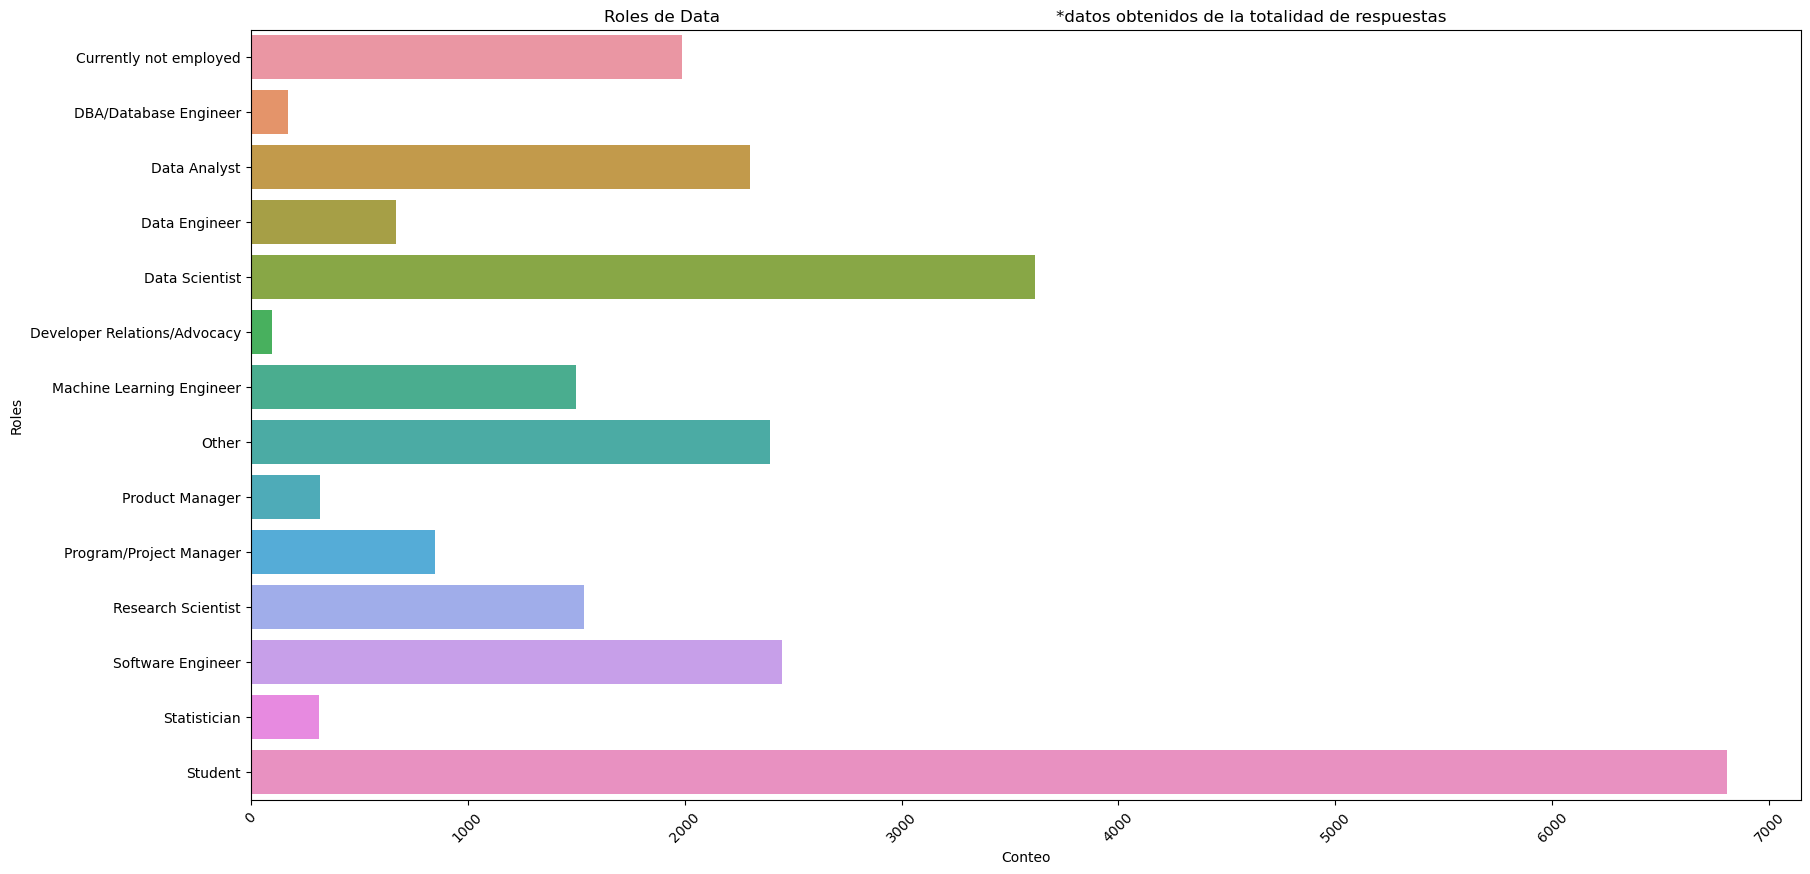

In [6]:
plt.figure(figsize=(20,10))
fig= sns.barplot(x ='count', y='q5', data=df_q5)
plt.title('Roles de Data                                                                *datos obtenidos de la totalidad de respuestas')
plt.xticks(rotation = 45)
fig.set(ylabel='Roles', xlabel= 'Conteo')


Q6: Creamos a nuestra persona tipo, respondiendo al target deseado por Adalab, Analista de Datos Junior con ninguna experiencia o una experiencia máxima de 2 años programando

In [7]:
df = pd.read_csv('./datos/data_analyst.csv', index_col = 0)
df.head()

,index,q3,q5,q6,q8,q11,q13,q15,q23,q33,q41,q7,q9,q12,q14,q16,q17,q24,q28,q10,q18,q19,q27,q29,q30,q31,q36,q37,q38,q39,q40,q42
32,32,United States of America,Data Analyst,< 1 years,R,A personal computer / desktop,Never,I do not use machine learning methods,NaN,NaN,NaN,R,RStudio,NVIDIA GPUs,Ggplot / ggplot2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,46,China,Data Analyst,< 1 years,Python,A personal computer / desktop,2-5 times,1-2 years,No (we do not use ML methods),NaN,"Basic statistical software (Microsoft Excel, G...","Python, SQL, C, C++, Java, Javascript, MATLAB","Jupyter ,PyCharm ,MATLAB ,Jupyter Notebook",NVIDIA GPUs,"Matplotlib ,Plotly / Plotly Express","Scikit-learn , TensorFlow ,Keras ,PyTorch","Linear or Logistic Regression, Decision Trees ...",Analyze and understand data to influence produ...,NaN,Kaggle Notebooks?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coursera?edX?Kaggle Learn Courses?,Twitter (data science influencers)?
66,66,China,Data Analyst,< 1 years,Python,A laptop,Never,< 1 year,I do not know,NaN,"Basic statistical software (Microsoft Excel, G...",Python,"PyCharm , Spyder",None,None,Other,Other,Analyze and understand data to influence produ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,102,India,Data Analyst,< 1 years,Python,A laptop,Once,< 1 year,We are exploring ML methods (and may one day p...,NaN,"Basic statistical software (Microsoft Excel, G...",Python,"Jupyter ,Jupyter Notebook",None,"Matplotlib ,Seaborn ,Ggplot / ggplot2","Scikit-learn , TensorFlow ,Keras ,Xgboost","Linear or Logistic Regression, Decision Trees ...",Analyze and understand data to influence produ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coursera?,NaN
108,108,Israel,Data Analyst,< 1 years,Python,A personal computer / desktop,Never,I do not use machine learning methods,We use ML methods for generating insights (but...,NaN,"Business intelligence software (Salesforce, Ta...","Python, SQL","Jupyter Notebook, Other",None,"Matplotlib ,Seaborn",NaN,NaN,Analyze and understand data to influence produ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coursera?,NaN


 - Años de experiencia deseados para nuestra persona tipo

In [8]:
df['q6'].unique()

array(['< 1 years', 'I have never written code'], dtype=object)

 - Rol o puesto deseado de nuestra persona tipo

In [9]:
df['q5'].unique()

array(['Data Analyst'], dtype=object)

Q7: Analizamos los lenguajes de programación más utilizados en Data Analyst

In [10]:
df_q7=df['q7'].reset_index()
df_q7

,index,q7
0,32,R
1,46,"Python, SQL, C, C++, Java, Javascript, MATLAB"
2,66,Python
3,102,Python
4,108,"Python, SQL"
...,...,...
746,25811,"Python, SQL"
747,25819,SQL
748,25909,"Python, SQL"
749,25916,"Python, SQL"


In [11]:
df_q7['q7'] = df_q7['q7'].apply(quitar_comillas_2)
df_7_explode = df_q7['q7'].explode().reset_index()
gb7 = df_7_explode.groupby('q7').size()
df_q7 = gb7.reset_index(name='count')
df_q7.drop(0, axis= 0,inplace=True)

[Text(0, 0.5, 'Lenguajes'), Text(0.5, 0, 'Conteo')]

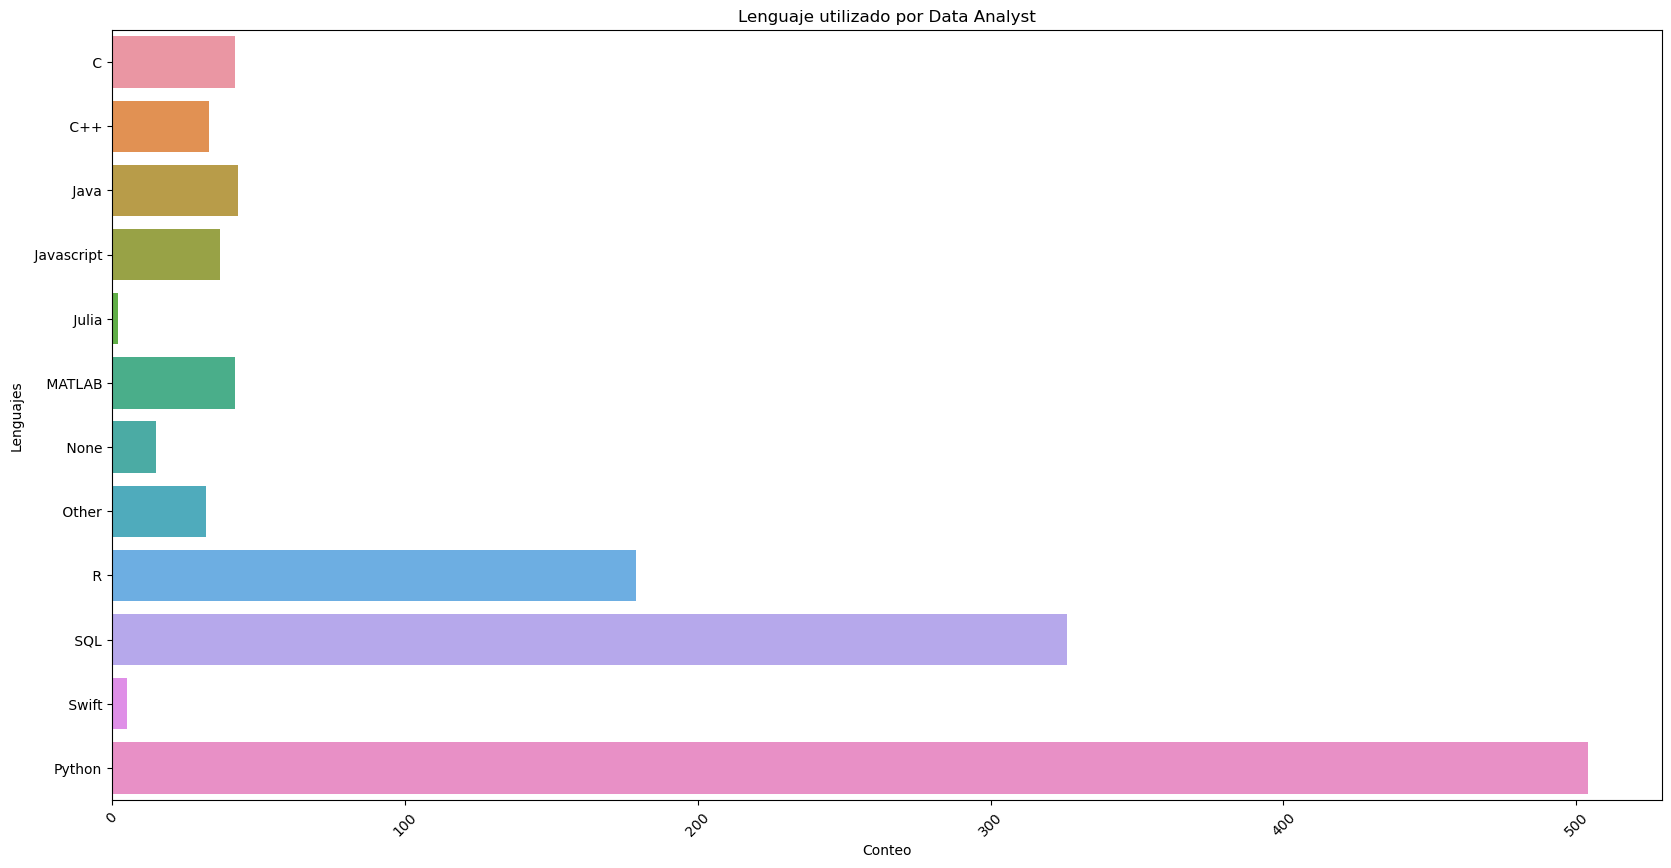

In [12]:
plt.figure(figsize=(20,10))
fig= sns.barplot(x ='count', y='q7', data=df_q7)
plt.title('Lenguaje utilizado por Data Analyst')
plt.xticks(rotation = 45)
fig.set(ylabel='Lenguajes', xlabel= 'Conteo')

Q8: Lenguaje recomendado a futuras Data Analyst

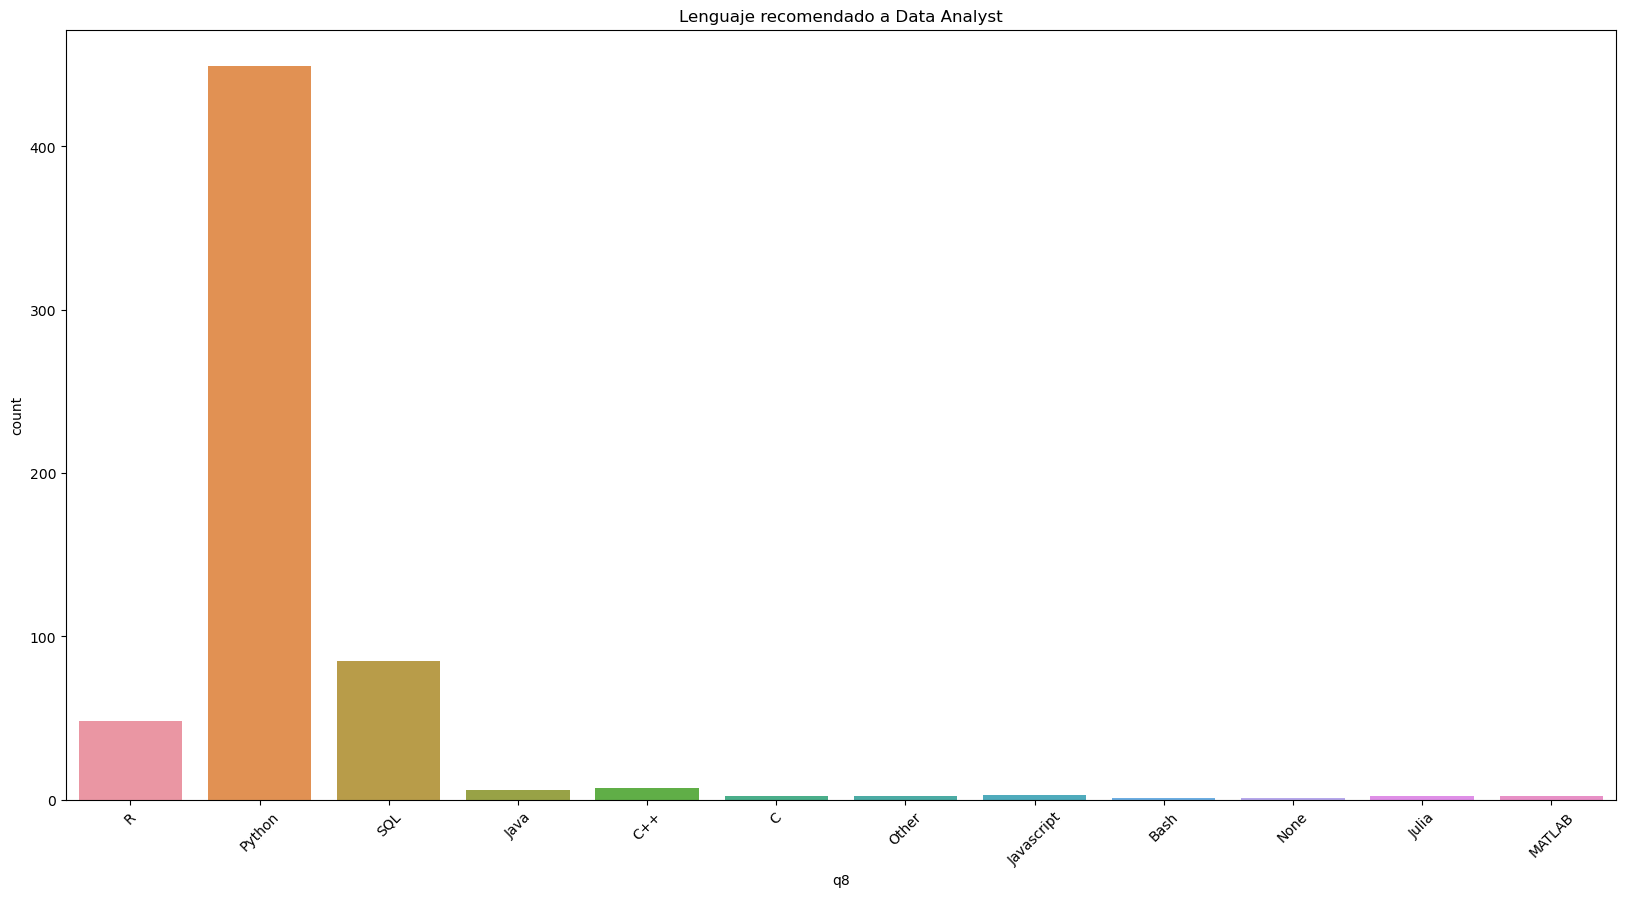

In [13]:
plt.figure(figsize=(20,10))
sns.countplot(x ='q8', data=df)
plt.title('Lenguaje recomendado a Data Analyst')
plt.xticks(rotation = 45);

Q9: Analizamos los entornos de desarrollo integrados que utiliza nuestra persona tipo

In [14]:
df_q9=df['q9'].reset_index()
df_q9

,index,q9
0,32,RStudio
1,46,"Jupyter ,PyCharm ,MATLAB ,Jupyter Notebook"
2,66,"PyCharm , Spyder"
3,102,"Jupyter ,Jupyter Notebook"
4,108,"Jupyter Notebook, Other"
...,...,...
746,25811,"PyCharm , Vim / Emacs,Jupyter Notebook"
747,25819,Visual Studio
748,25909,Jupyter Notebook
749,25916,Jupyter Notebook


In [15]:
df_q9['q9'] = df_q9['q9'].apply(quitar_comillas_2)
df_9_explode = df_q9['q9'].explode().reset_index()
gb9 = df_9_explode.groupby('q9').size()
df_q9 = gb9.reset_index(name='count')
df_q9.drop(0, axis= 0,inplace=True)

In [16]:
df_q9['q9'].head()

1        Notepad++
2            Other
3           Spyder
4     Sublime Text
5      Vim / Emacs
Name: q9, dtype: object

In [17]:
df_q9['q9'].unique()

array([' Notepad++', ' Other', ' Spyder', ' Sublime Text', ' Vim / Emacs',
       'Jupyter  ', 'Jupyter Notebook', 'MATLAB ', 'PyCharm ', 'RStudio ',
       'Visual Studio ', 'Visual Studio Code  '], dtype=object)

[Text(0, 0.5, 'Entornos'), Text(0.5, 0, 'Conteo')]

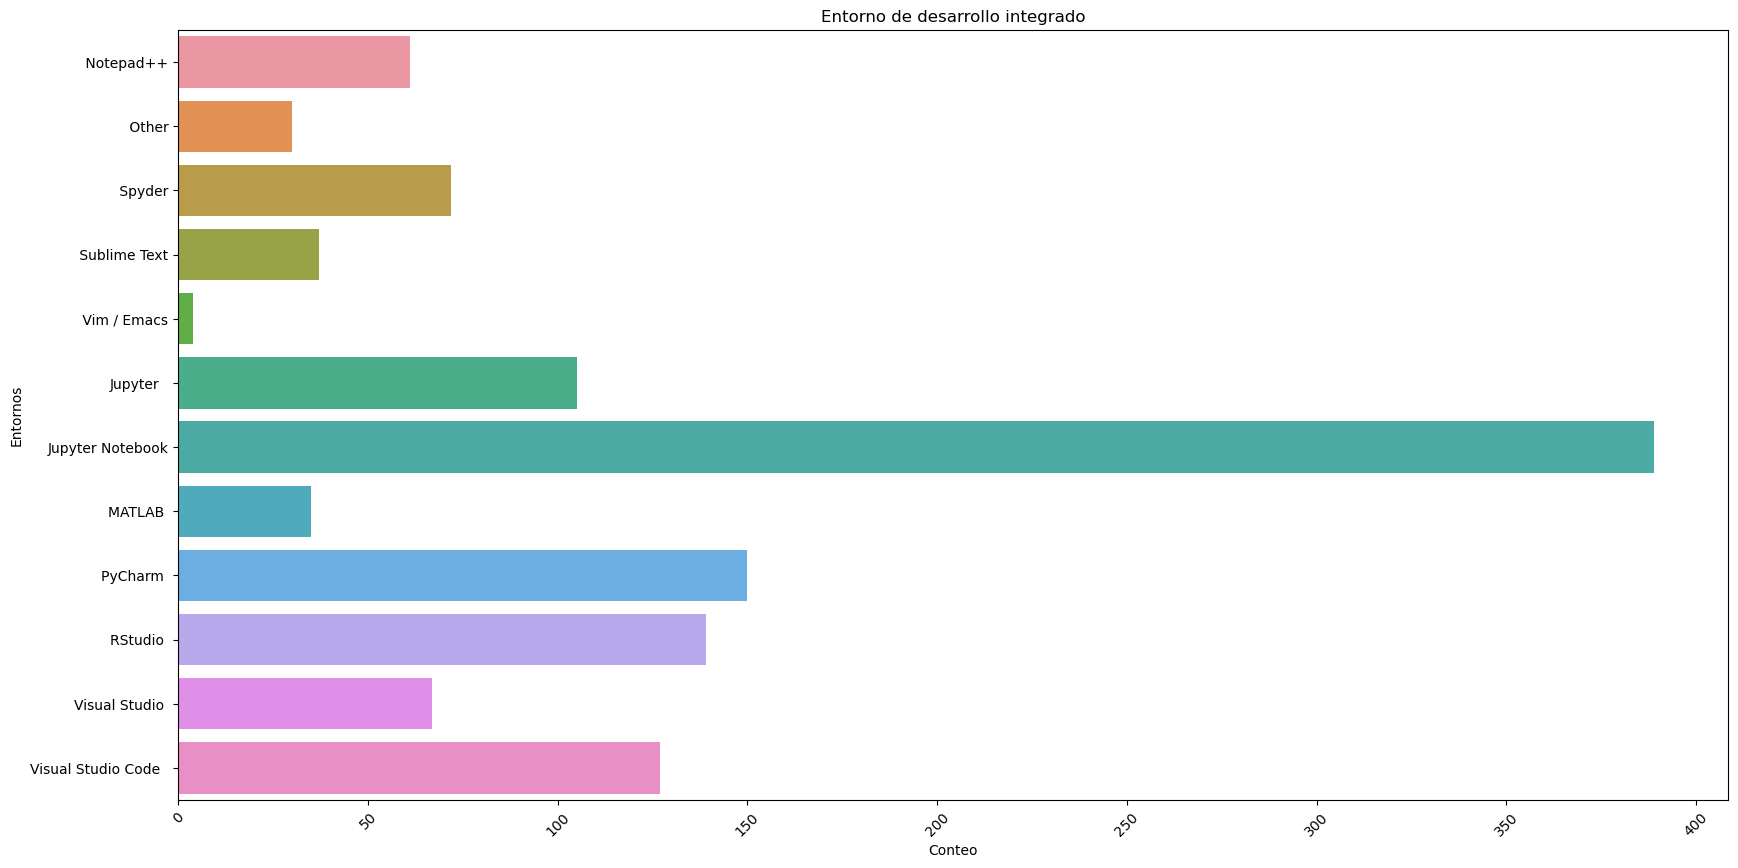

In [18]:
plt.figure(figsize=(20,10))
fig= sns.barplot(x ='count', y='q9', data=df_q9)
plt.title('Entorno de desarrollo integrado')
plt.xticks(rotation = 45)
fig.set(ylabel='Entornos', xlabel= 'Conteo')

Q10: Herramientas de Trabajo (los Data Analyst en activo recomiendan Kaggle como entorno colaborativo para ejecutar código)

In [19]:
def quitar_comillas (col):
        try:
            return col.split('?')
        except:
           return np.nan

In [20]:
df_q10=df['q10'].reset_index()
df_q10

,index,q10
0,32,NaN
1,46,Kaggle Notebooks?
2,66,NaN
3,102,NaN
4,108,NaN
...,...,...
746,25811,NaN
747,25819,NaN
748,25909,NaN
749,25916,NaN


In [21]:
df_q10['q10'] = df_q10['q10'].apply(quitar_comillas)

In [22]:
df_10_explode = df_q10['q10'].explode().reset_index()

In [23]:
df_10_explode

,index,q10
0,0,NaN
1,1,Kaggle Notebooks
2,1,
3,2,NaN
4,3,NaN
...,...,...
1070,746,NaN
1071,747,NaN
1072,748,NaN
1073,749,NaN


In [24]:
df_10_explode['q10'].unique()

array([nan, ' Kaggle Notebooks', '', 'Colab Notebooks', 'Azure Notebooks',
       ' Paperspace / Gradient ', ' Binder / JupyterHub ', ' Code Ocean ',
       ' IBM Watson Studio ', ' Amazon Sagemaker Studio Notebooks ',
       ' Amazon EMR Notebooks ',
       'Google Cloud Notebooks (AI Platform / Vertex AI) ',
       'Google Cloud Datalab', ' Databricks Collaborative Notebooks ',
       ' Zeppelin / Zepl Notebooks ', ' Deepnote Notebooks ',
       ' Observable Notebooks '], dtype=object)

In [25]:
df_10_explode=df_10_explode.fillna('ninguno')

- Aquí tenemos todos los espacios que se tienen que desestimar para la creación de gráficas

In [26]:
gb = df_10_explode.groupby('q10').size() 

In [27]:
df_q10 = gb.reset_index(name='count')

In [28]:
df_q10.drop(0, axis= 0,inplace=True)

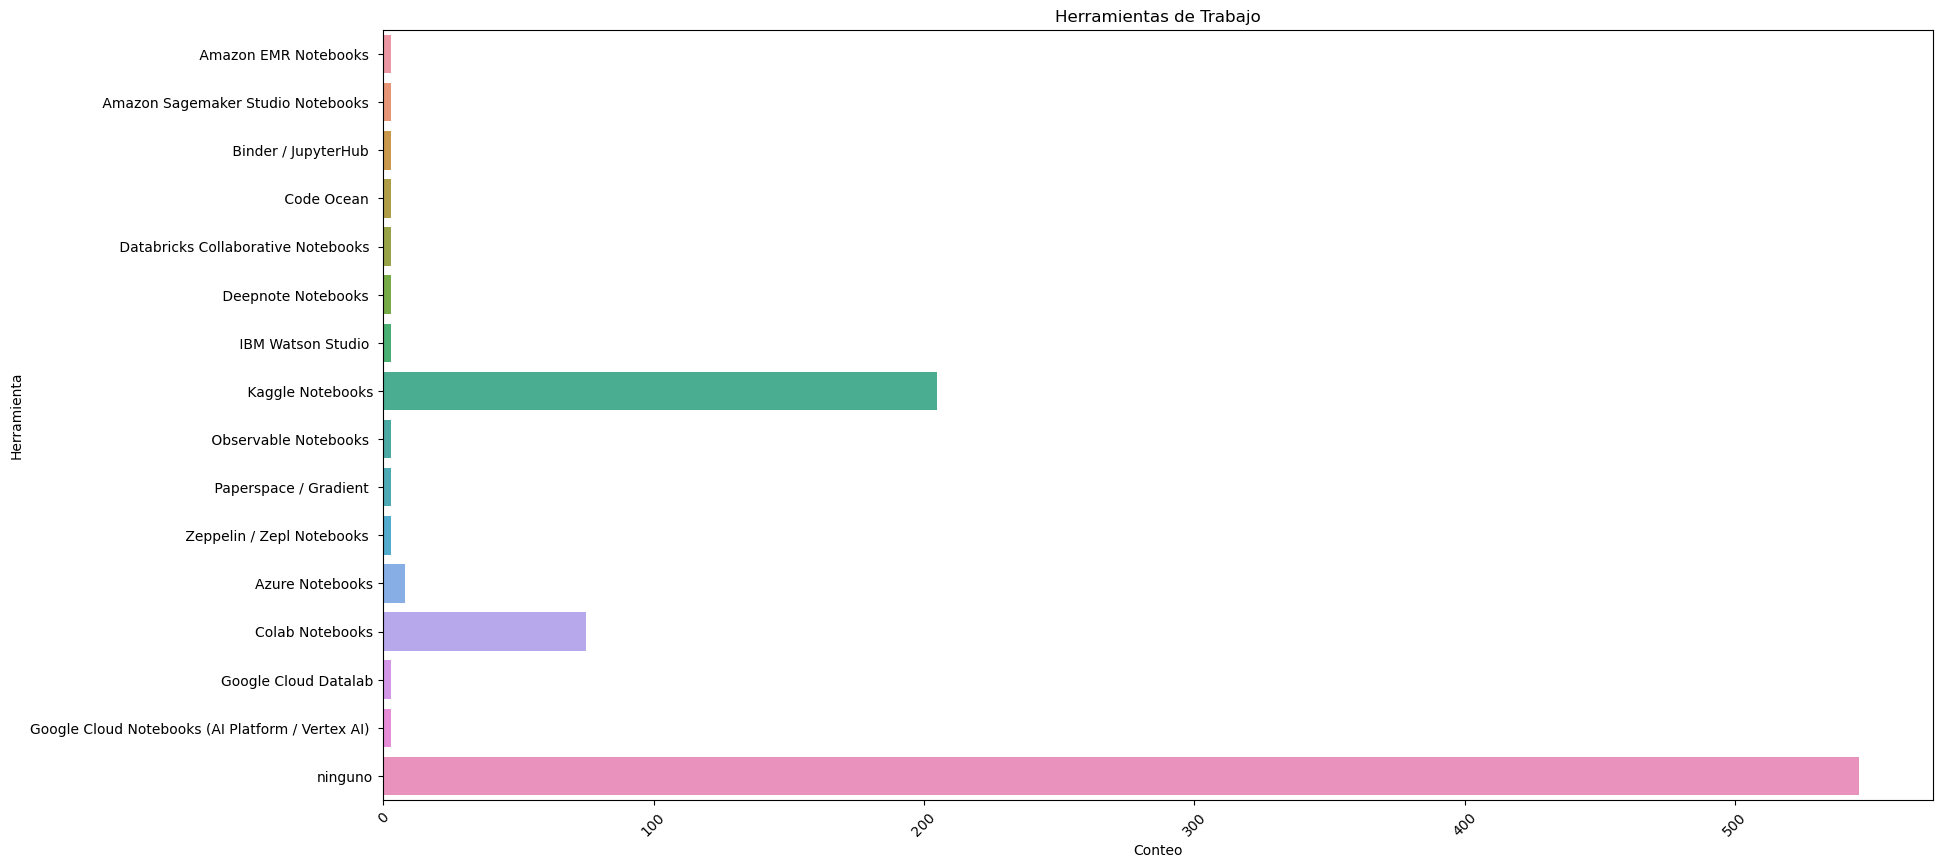

In [29]:
plt.figure(figsize=(20,10))
fig=sns.barplot(x ='count', y = 'q10', data=df_q10)
plt.title('Herramientas de Trabajo')
plt.xticks(rotation = 45)
fig.set(ylabel='Herramienta', xlabel= 'Conteo');

Q11: Analizamos el tipo de computadora que utiliza nuestra persona tipo para participar en los proyectos de Data

In [30]:
df_q11=df['q11'].reset_index()
df_q11

,index,q11
0,32,A personal computer / desktop
1,46,A personal computer / desktop
2,66,A laptop
3,102,A laptop
4,108,A personal computer / desktop
...,...,...
746,25811,A laptop
747,25819,A laptop
748,25909,A laptop
749,25916,A laptop


In [31]:
df_q11['q11'] = df_q11['q11'].apply(quitar_comillas_2)
df_11_explode = df_q11['q11'].explode().reset_index()
gb11 = df_11_explode.groupby('q11').size()
df_q11 = gb11.reset_index(name='count')
df_q11.drop(0, axis= 0,inplace=True)

[Text(0, 0.5, 'Herramienta'), Text(0.5, 0, 'Conteo')]

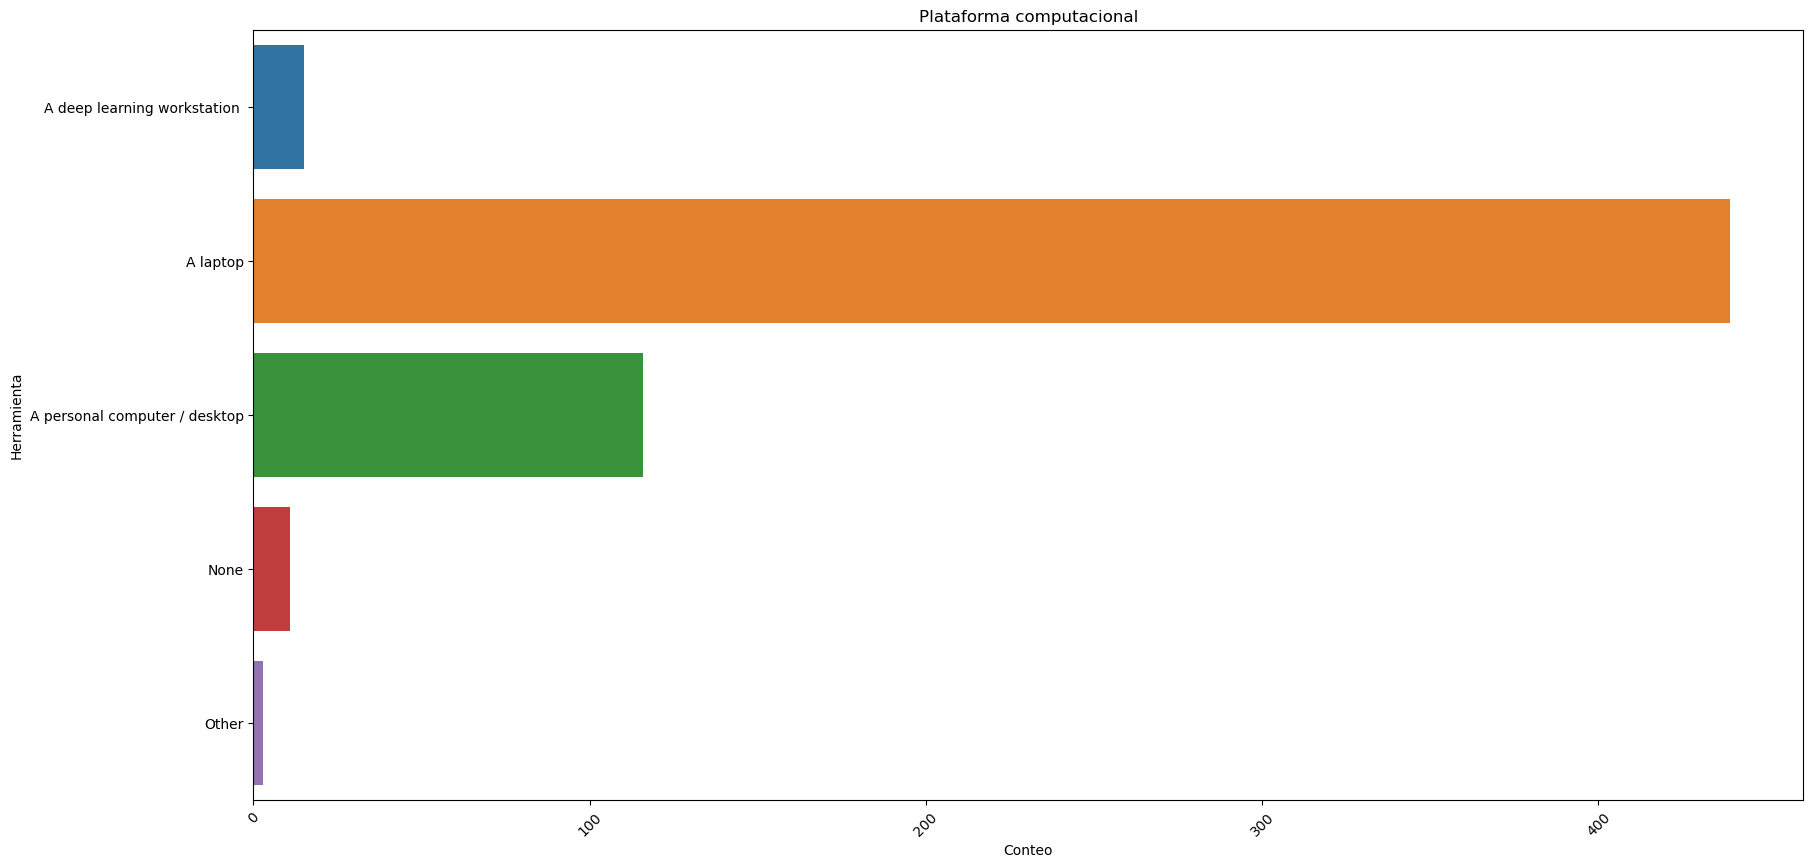

In [32]:
plt.figure(figsize=(20,10))
fig= sns.barplot(x ='count', y='q11', data=df_q11)
plt.title('Plataforma computacional')
plt.xticks(rotation = 45)
fig.set(ylabel='Herramienta', xlabel= 'Conteo')

Q14: Librerías de visualización de datos

In [33]:
df_q14=df['q14'].reset_index()
df_q14

,index,q14
0,32,Ggplot / ggplot2
1,46,"Matplotlib ,Plotly / Plotly Express"
2,66,None
3,102,"Matplotlib ,Seaborn ,Ggplot / ggplot2"
4,108,"Matplotlib ,Seaborn"
...,...,...
746,25811,"Matplotlib ,Seaborn ,Plotly / Plotly Express"
747,25819,None
748,25909,NaN
749,25916,"Matplotlib ,Seaborn"


In [34]:
df_q14['q14'] = df_q14['q14'].apply(quitar_comillas_2)
df_q14_explode = df_q14['q14'].explode().reset_index()
gb14 = df_q14_explode.groupby('q14').size()
df_q14 = gb14.reset_index(name='count')
df_q14.drop(0, axis= 0,inplace=True)

[Text(0, 0.5, 'Librerías'), Text(0.5, 0, 'Conteo')]

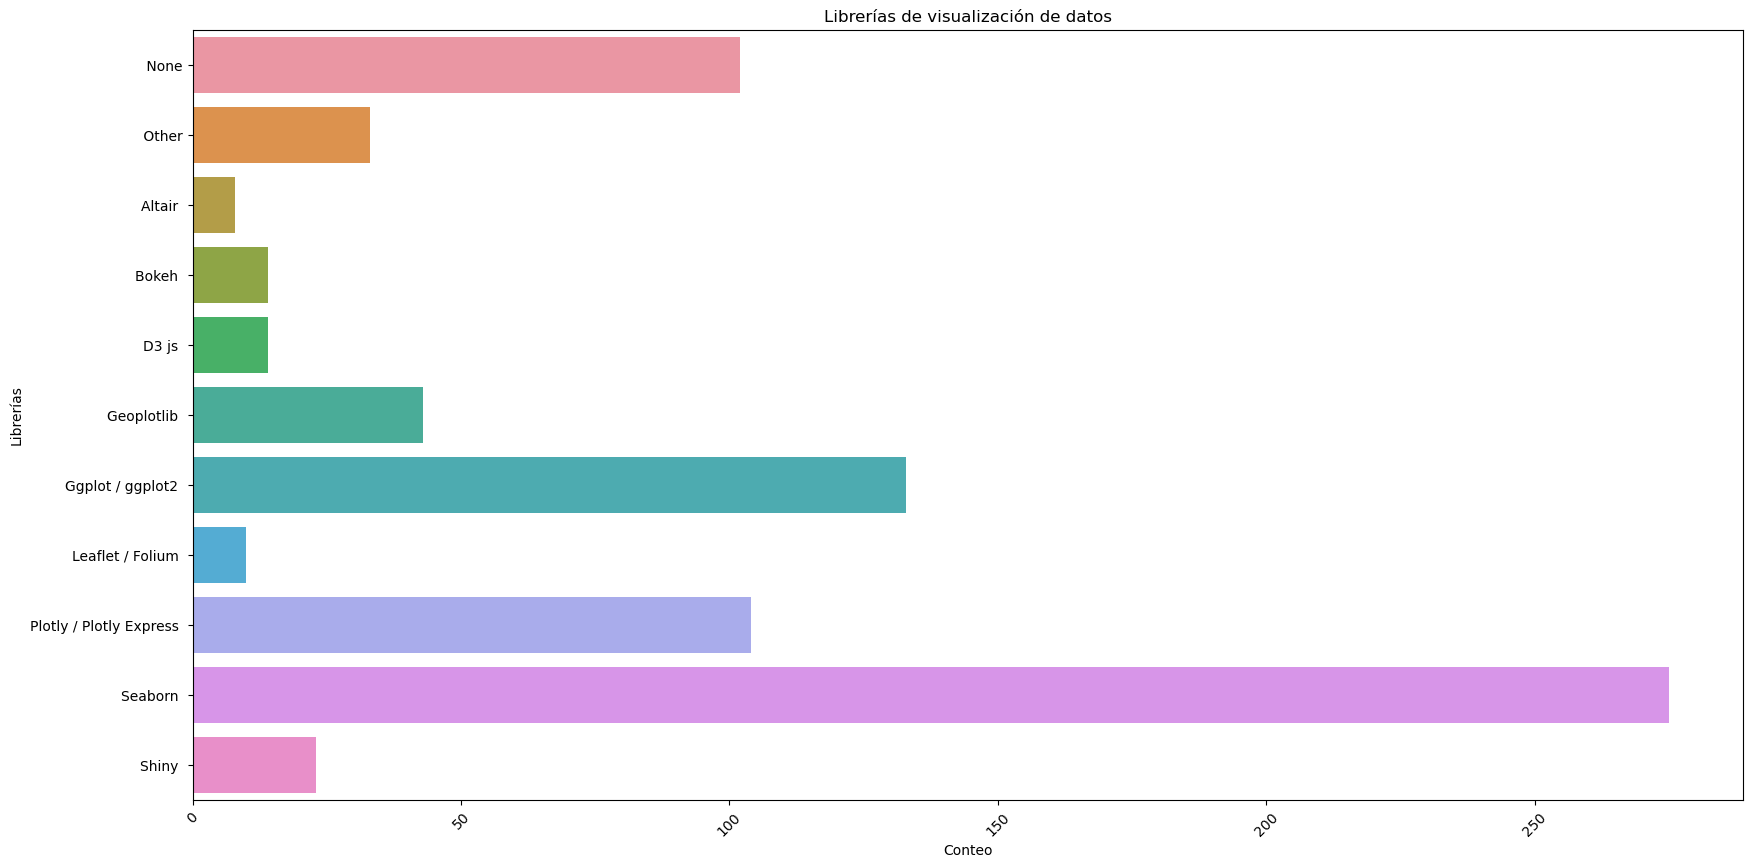

In [35]:
plt.figure(figsize=(20,10))
fig= sns.barplot(x ='count', y='q14', data=df_q14)
plt.title('Librerías de visualización de datos')
plt.xticks(rotation = 45)
fig.set(ylabel='Librerías', xlabel= 'Conteo')

Q19: Métodos de procesamiento natural del lenguaje(NLP)

In [36]:
df_q19 = df['q19'].reset_index()
df_q19

,index,q19
0,32,NaN
1,46,NaN
2,66,NaN
3,102,NaN
4,108,NaN
...,...,...
746,25811,NaN
747,25819,NaN
748,25909,NaN
749,25916,NaN


In [37]:
df_q19['q19'] = df_q19['q19'].apply(quitar_comillas)

In [38]:
df_19_explode = df_q19['q19'].explode().reset_index()

In [39]:
df_19_explode

,index,q19
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN
...,...,...
779,746,NaN
780,747,NaN
781,748,NaN
782,749,NaN


In [40]:
df_19_explode['q19'].unique()

array([nan, 'Word embeddings/vectors (GLoVe, fastText, word2vec)', '',
       'Encoder-decorder models (seq2seq, vanilla transformers)',
       'Contextualized embeddings (ELMo, CoVe)',
       'Transformer language models (GPT-3, BERT, XLnet, etc)'],
      dtype=object)

In [41]:
df_19_explode['q19'].unique()

array([nan, 'Word embeddings/vectors (GLoVe, fastText, word2vec)', '',
       'Encoder-decorder models (seq2seq, vanilla transformers)',
       'Contextualized embeddings (ELMo, CoVe)',
       'Transformer language models (GPT-3, BERT, XLnet, etc)'],
      dtype=object)

In [42]:
df_19_explode=df_19_explode.fillna('ninguno')

In [43]:
gb_19 = df_19_explode.groupby('q19').size()

In [44]:
df_q19 = gb_19.reset_index(name = 'count')

In [45]:
df_q19.drop(0, axis = 0,inplace = True)

In [46]:
df_q19

,q19,count
1,"Contextualized embeddings (ELMo, CoVe)",4
2,"Encoder-decorder models (seq2seq, vanilla tran...",11
3,"Transformer language models (GPT-3, BERT, XLne...",3
4,"Word embeddings/vectors (GLoVe, fastText, word...",15
5,ninguno,736


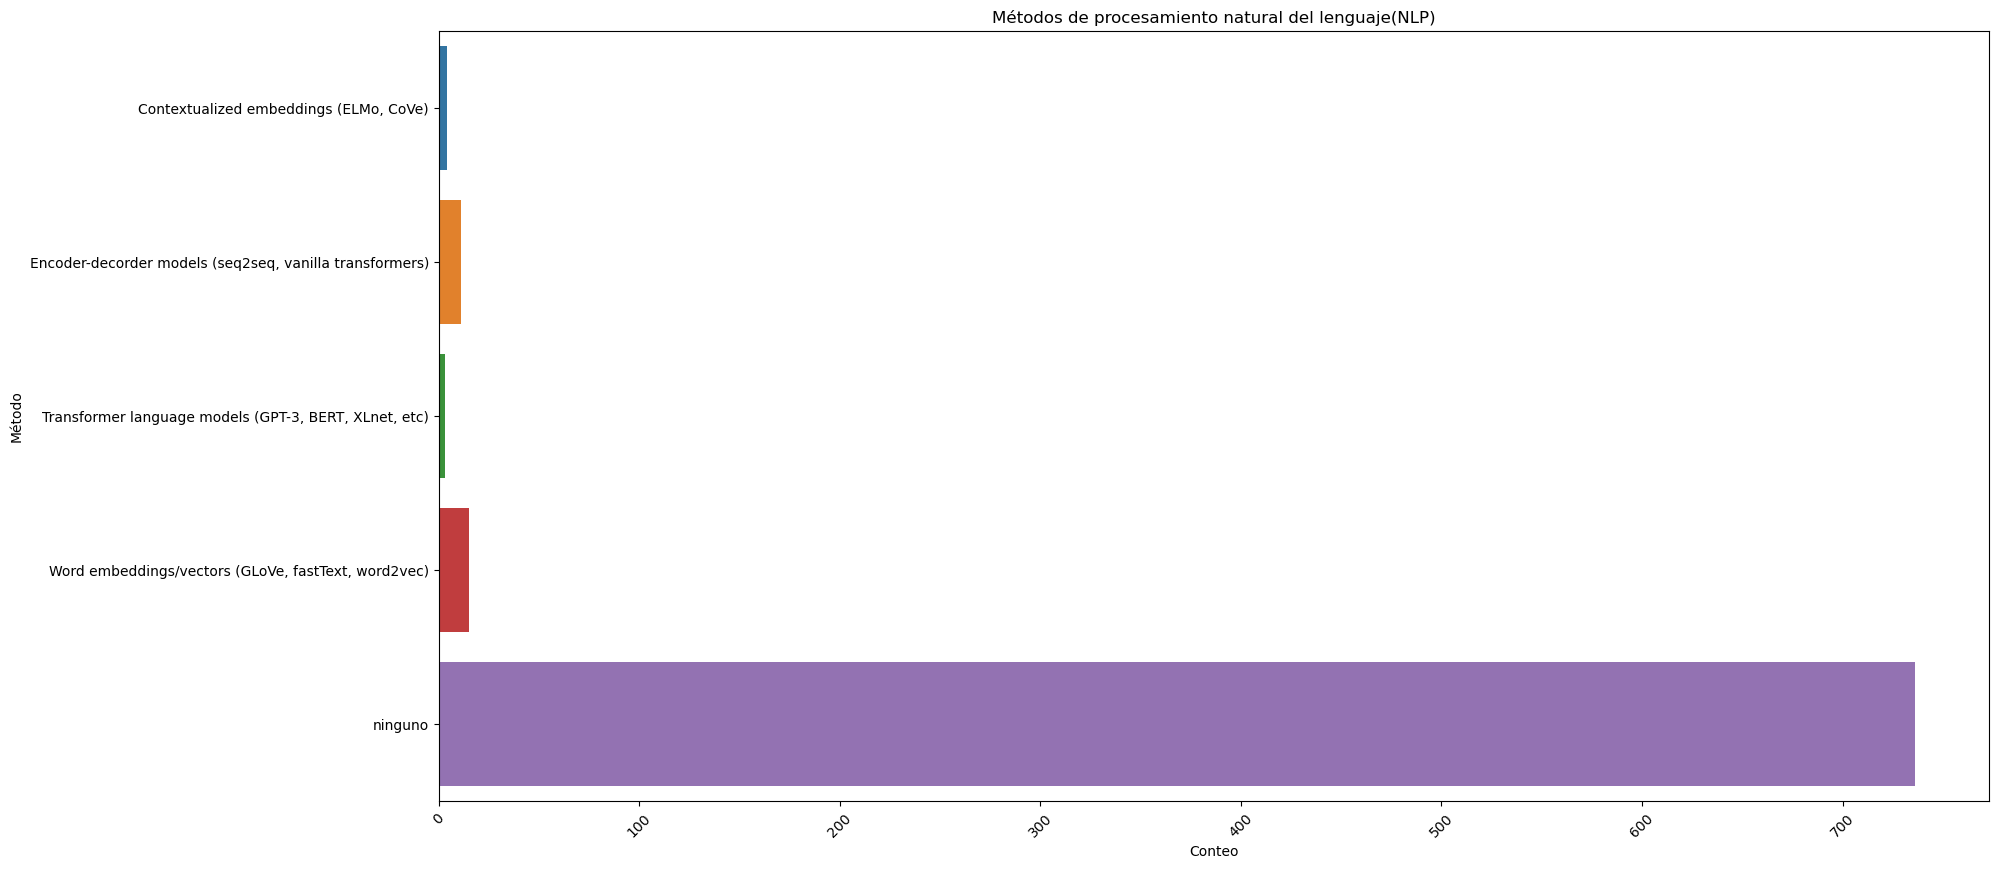

In [47]:
plt.figure(figsize=(20,10))
fig=sns.barplot(x='count', y = 'q19', data = df_q19)
plt.title('Métodos de procesamiento natural del lenguaje(NLP)')
plt.xticks(rotation = 45)
fig.set(ylabel='Método', xlabel= 'Conteo');


Q27: Plataformas computacionales en la nube

In [48]:
df_q27 = df['q27'].reset_index()
df_q27

,index,q27
0,32,NaN
1,46,NaN
2,66,NaN
3,102,NaN
4,108,NaN
...,...,...
746,25811,NaN
747,25819,NaN
748,25909,NaN
749,25916,NaN


In [49]:
df_q27['q27'] = df_q27['q27'].apply(quitar_comillas)

In [50]:
df_27_explode = df_q27['q27'].explode().reset_index()

In [51]:
df_27_explode

,index,q27
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN
...,...,...
851,746,NaN
852,747,NaN
853,748,NaN
854,749,NaN


In [52]:
df_27_explode=df_27_explode.fillna('ninguno')

In [53]:
df_27_explode['q27'].unique()

array(['ninguno', ' Amazon Web Services (AWS) ', ' Microsoft Azure ',
       ' Google Cloud Platform (GCP) ', '', ' IBM Cloud / Red Hat '],
      dtype=object)

In [54]:
gb_27 = df_27_explode.groupby('q27').size() 

In [55]:
df_q27 = gb_27.reset_index(name = 'count')

In [56]:
df_q27.drop(0, axis = 0,inplace = True)

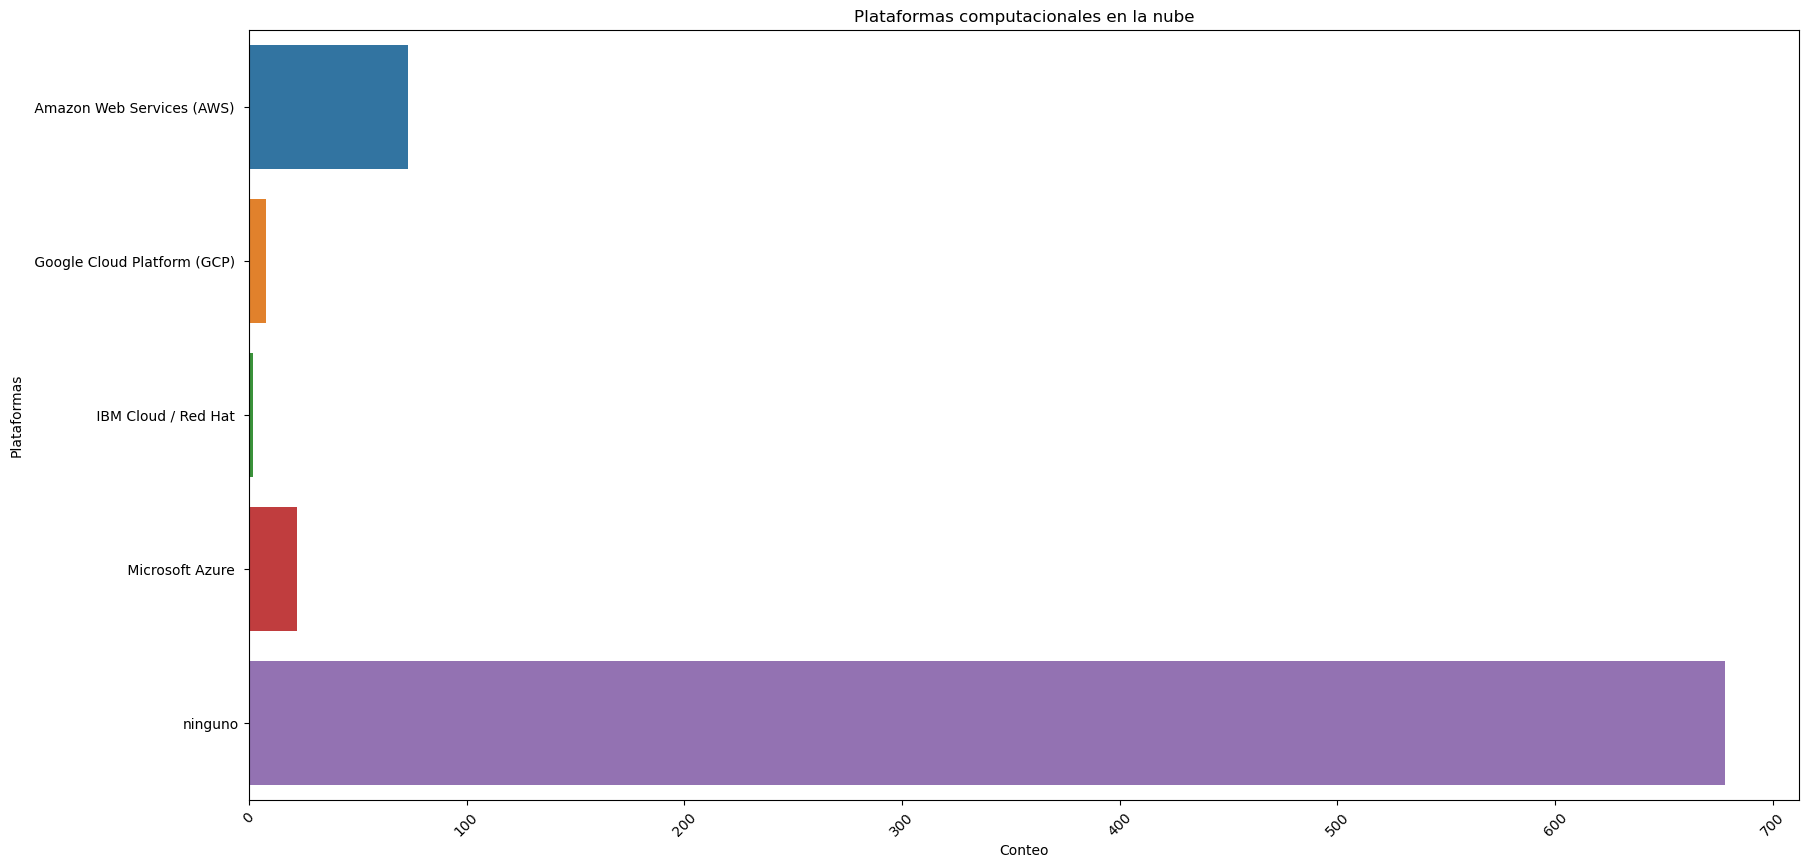

In [57]:
plt.figure(figsize=(20,10))
fig=sns.barplot(x ='count', y = 'q27', data = df_q27)
plt.title('Plataformas computacionales en la nube')
fig.set(ylabel='Plataformas', xlabel= 'Conteo')
plt.xticks(rotation = 45);



Q29: Productos de la Nube

In [58]:
df_q29=df['q29'].reset_index()
df_q29

,index,q29
0,32,NaN
1,46,NaN
2,66,NaN
3,102,NaN
4,108,NaN
...,...,...
746,25811,NaN
747,25819,NaN
748,25909,NaN
749,25916,NaN


In [59]:
df_q29['q29'] = df_q29['q29'].apply(quitar_comillas)
df_q29

,index,q29
0,32,NaN
1,46,NaN
2,66,NaN
3,102,NaN
4,108,NaN
...,...,...
746,25811,NaN
747,25819,NaN
748,25909,NaN
749,25916,NaN


In [60]:
df_29_explode = df_q29['q29'].explode().reset_index()
df_29_explode


,index,q29
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN
...,...,...
786,746,NaN
787,747,NaN
788,748,NaN
789,749,NaN


In [61]:
df_29_explode=df_29_explode.fillna('ninguno')

In [62]:
df_29_gp = df_29_explode.groupby('q29').size()
df_29_gp

q29
                                         31
 Amazon Elastic Compute Cloud (EC2)      31
 Google Cloud Compute Engine              2
 Microsoft Azure Virtual Machines         7
ninguno                                 720
dtype: int64

In [63]:
df_29_gp = df_29_gp.reset_index(name='count')
df_29_gp

,q29,count
0,,31
1,Amazon Elastic Compute Cloud (EC2),31
2,Google Cloud Compute Engine,2
3,Microsoft Azure Virtual Machines,7
4,ninguno,720


In [64]:
df_29_gp.drop(0, axis = 0,inplace = True)

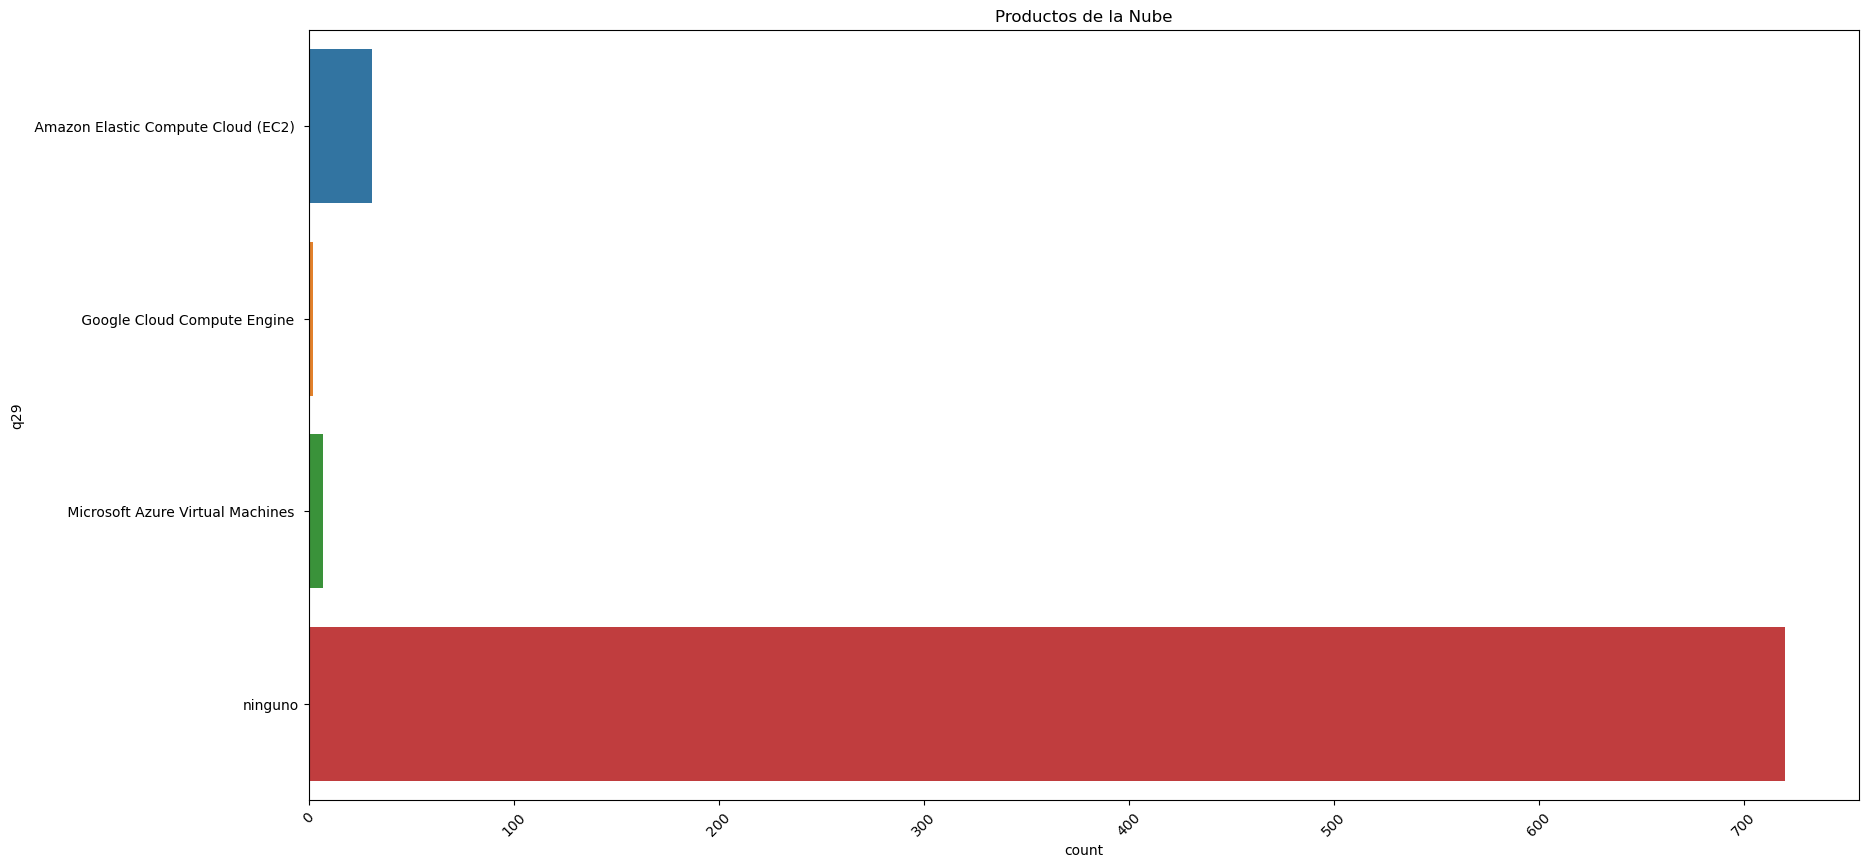

In [65]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q29', data=df_29_gp)
plt.title('Productos de la Nube')
fig.set(ylabel='Herramienta', xlabel= 'Conteo')
plt.xticks(rotation = 45);

Q30: Productos de almacenamiento de datos

In [66]:
df_q30=df['q30'].reset_index()
df_q30

,index,q30
0,32,NaN
1,46,NaN
2,66,NaN
3,102,NaN
4,108,NaN
...,...,...
746,25811,NaN
747,25819,NaN
748,25909,NaN
749,25916,NaN


In [67]:
df_q30['q30'] = df_q30['q30'].apply(quitar_comillas)
df_q30

,index,q30
0,32,NaN
1,46,NaN
2,66,NaN
3,102,NaN
4,108,NaN
...,...,...
746,25811,NaN
747,25819,NaN
748,25909,NaN
749,25916,NaN


In [68]:
df_30_explode = df_q30['q30'].explode().reset_index()
df_30_explode

,index,q30
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN
...,...,...
786,746,NaN
787,747,NaN
788,748,NaN
789,749,NaN


In [69]:
df_30_explode=df_30_explode.fillna('ninguno')

In [70]:
df_30_gp = df_30_explode.groupby('q30').size()
df_30_gp

q30
                                          25
 Amazon Elastic File System (EFS)          1
 Amazon Simple Storage Service (S3)        2
Google Cloud Storage (GCS)                 1
Microsoft Azure Data Lake Storage         25
Microsoft Azure Disk Storage              11
ninguno                                  726
dtype: int64

In [71]:
df_30_gp= df_30_gp.reset_index(name='count')
df_30_gp

,q30,count
0,,25
1,Amazon Elastic File System (EFS),1
2,Amazon Simple Storage Service (S3),2
3,Google Cloud Storage (GCS),1
4,Microsoft Azure Data Lake Storage,25
5,Microsoft Azure Disk Storage,11
6,ninguno,726


In [72]:
df_30_gp.drop(0, axis= 0,inplace=True)

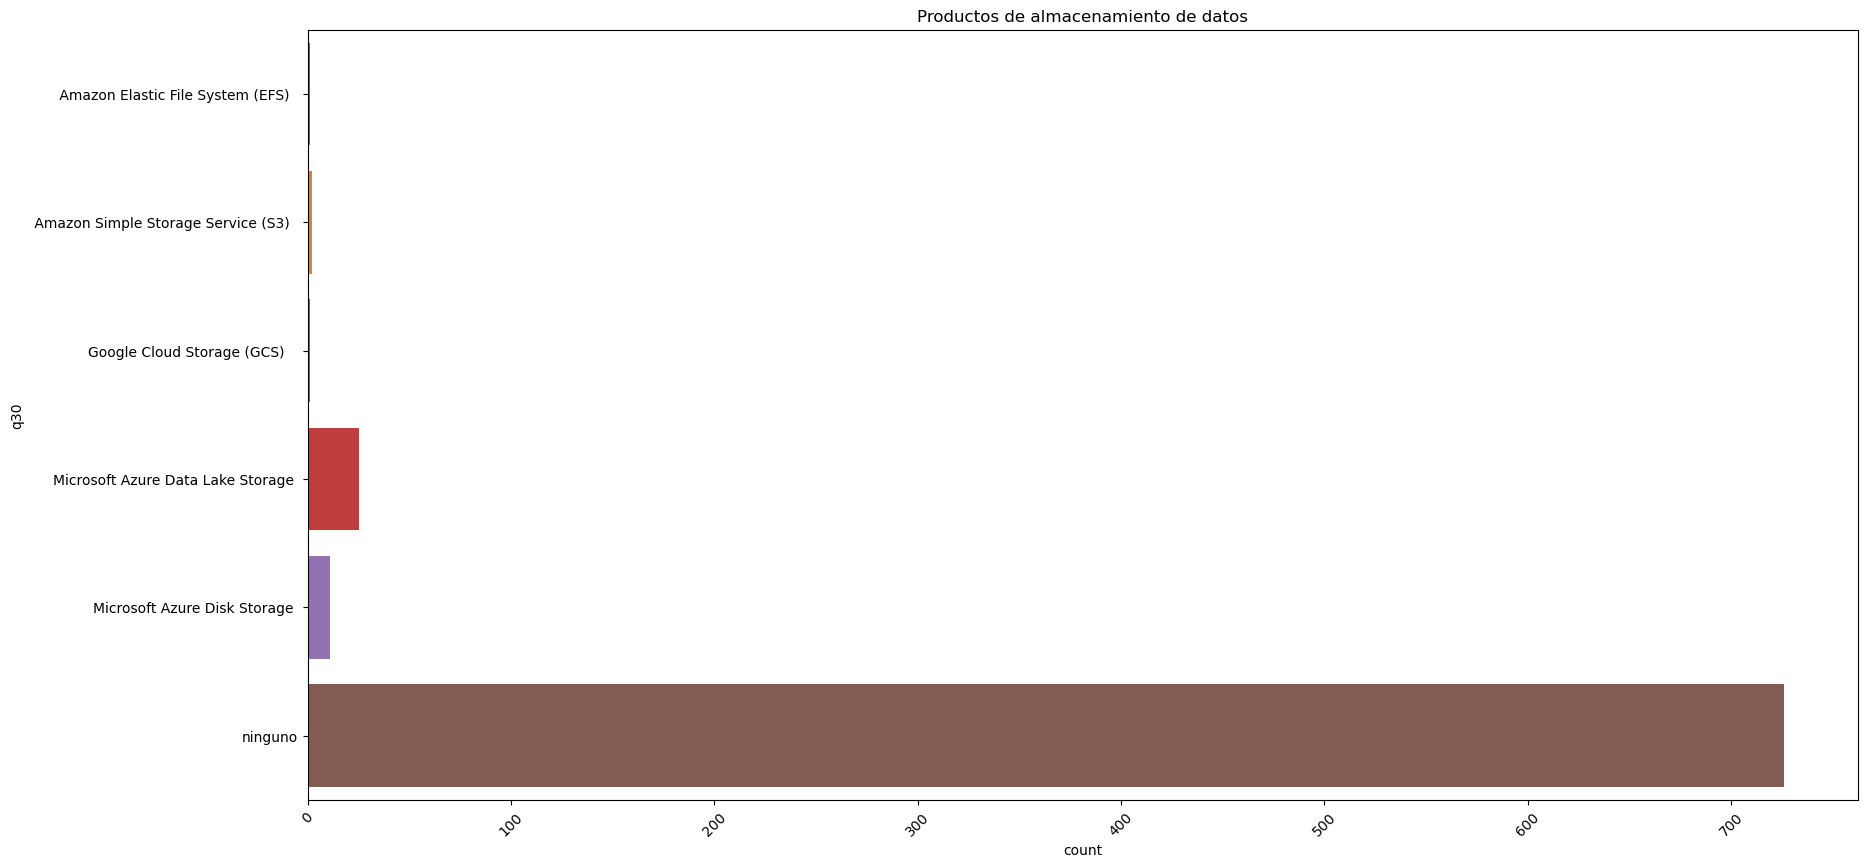

In [73]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q30', data=df_30_gp)
plt.title('Productos de almacenamiento de datos')
fig.set(ylabel='Productos', xlabel= 'Conteo')
plt.xticks(rotation = 45);

Q31: Productos de machine learning

In [74]:
df_q31=df['q31'].reset_index()
df_q31

,index,q31
0,32,NaN
1,46,NaN
2,66,NaN
3,102,NaN
4,108,NaN
...,...,...
746,25811,NaN
747,25819,NaN
748,25909,NaN
749,25916,NaN


In [75]:
df_q31['q31'] = df_q31['q31'].apply(quitar_comillas)
df_q31

,index,q31
0,32,NaN
1,46,NaN
2,66,NaN
3,102,NaN
4,108,NaN
...,...,...
746,25811,NaN
747,25819,NaN
748,25909,NaN
749,25916,NaN


In [76]:
df_31_explode = df_q31['q31'].explode().reset_index()
df_31_explode

,index,q31
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN
...,...,...
764,746,NaN
765,747,NaN
766,748,NaN
767,749,NaN


In [77]:
df_31_explode=df_31_explode.fillna('ninguno')

In [78]:
df_31_gp = df_31_explode.groupby('q31').size()
df_31_gp

q31
                                    16
 Amazon SageMaker                   16
 Azure Machine Learning Studio       2
ninguno                            735
dtype: int64

In [79]:
df_31_gp= df_31_gp.reset_index(name='count')
df_31_gp.drop(0, axis= 0,inplace=True)
df_31_gp

,q31,count
1,Amazon SageMaker,16
2,Azure Machine Learning Studio,2
3,ninguno,735


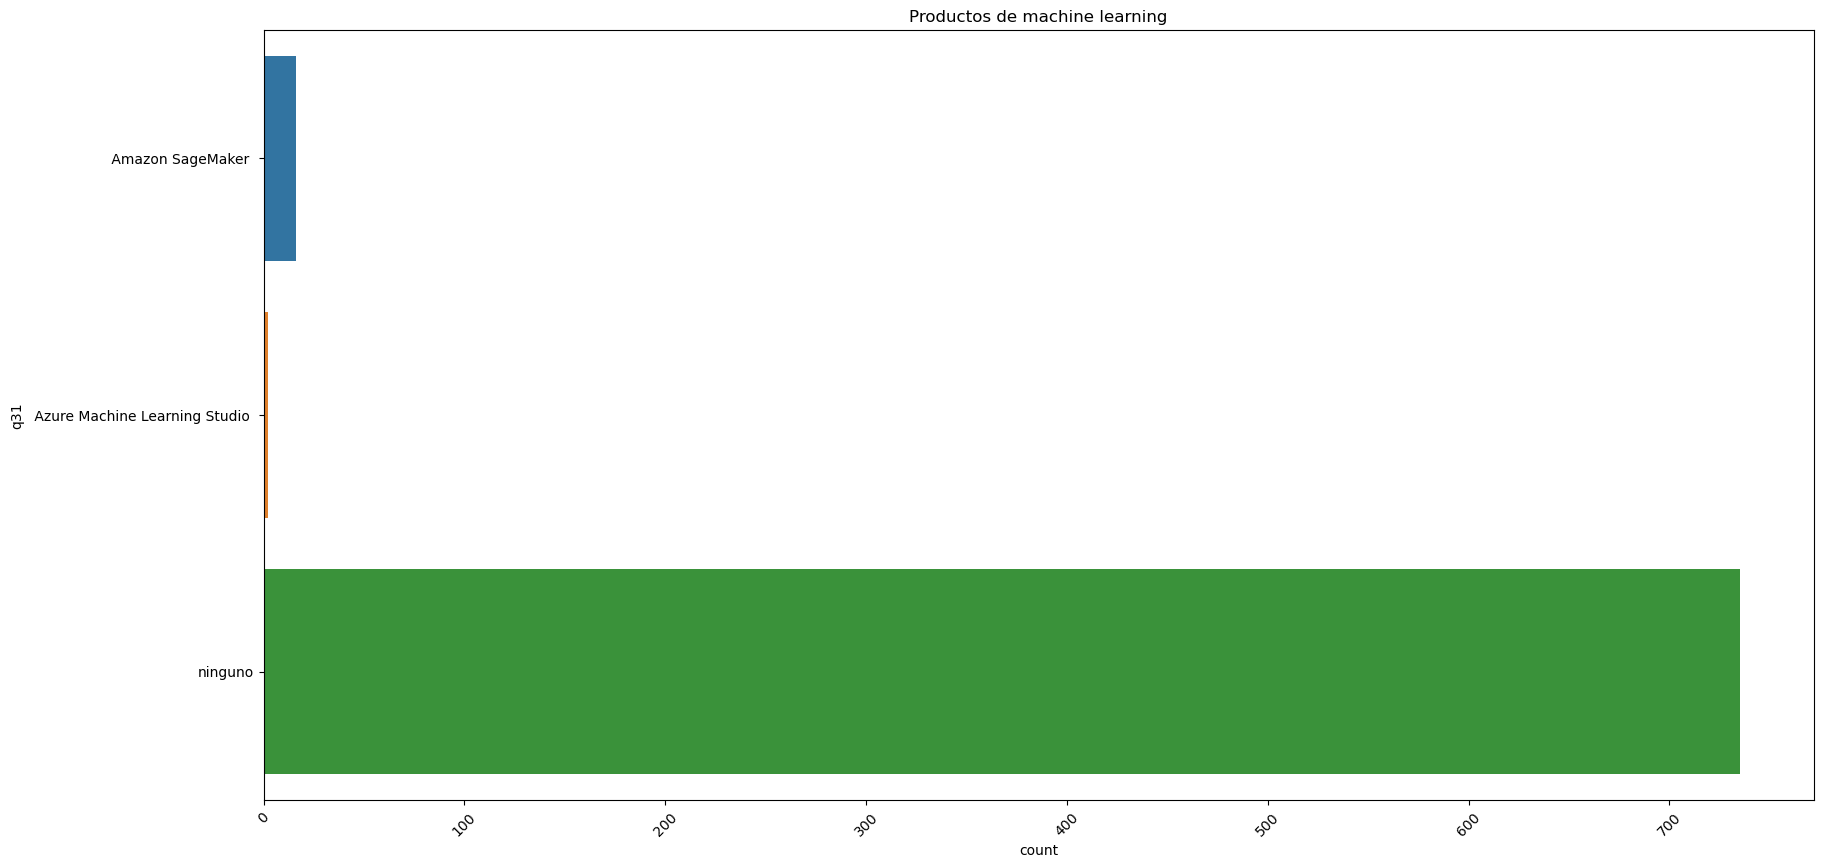

In [80]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q31', data=df_31_gp)
plt.title('Productos de machine learning')
fig.set(ylabel='Productos', xlabel= 'Conteo')
plt.xticks(rotation = 45);

Q33: Productos de Big Data

In [81]:
df_q33=df['q33'].reset_index()
df_q33

,index,q33
0,32,NaN
1,46,NaN
2,66,NaN
3,102,NaN
4,108,NaN
...,...,...
746,25811,NaN
747,25819,NaN
748,25909,NaN
749,25916,NaN


In [82]:
df_q33['q33'] = df_q33['q33'].apply(quitar_comillas)

In [83]:
df_q33_explode = df_q33['q33'].explode().reset_index()

In [84]:
df_q33_explode['q33'].unique()

array([nan, 'Google Cloud BigQuery ', 'Microsoft Azure SQL Database ',
       'Microsoft SQL Server ', 'MySQL ', 'SQLite ', 'Google Cloud SQL ',
       'MongoDB ', 'Google Cloud Spanner ', 'Oracle Database ',
       'Microsoft Azure Cosmos DB ', 'Google Cloud Firestore ',
       'Google Cloud BigTable ', 'PostgreSQL ', 'Amazon Redshift ',
       'Amazon DynamoDB ', 'IBM Db2 '], dtype=object)

In [85]:
df_q33_explode=df_q33_explode.fillna('ninguno')

In [86]:
gb_q33 = df_q33_explode.groupby('q33').size()

In [87]:
df_q33 = gb_q33.reset_index(name='count')

In [88]:
df_q33

,q33,count
0,Amazon DynamoDB,1
1,Amazon Redshift,1
2,Google Cloud BigQuery,16
3,Google Cloud BigTable,2
4,Google Cloud Firestore,3
5,Google Cloud SQL,5
6,Google Cloud Spanner,2
7,IBM Db2,1
8,Microsoft Azure Cosmos DB,3
9,Microsoft Azure SQL Database,6


In [89]:
df_q33.drop(0, axis= 0,inplace=True)

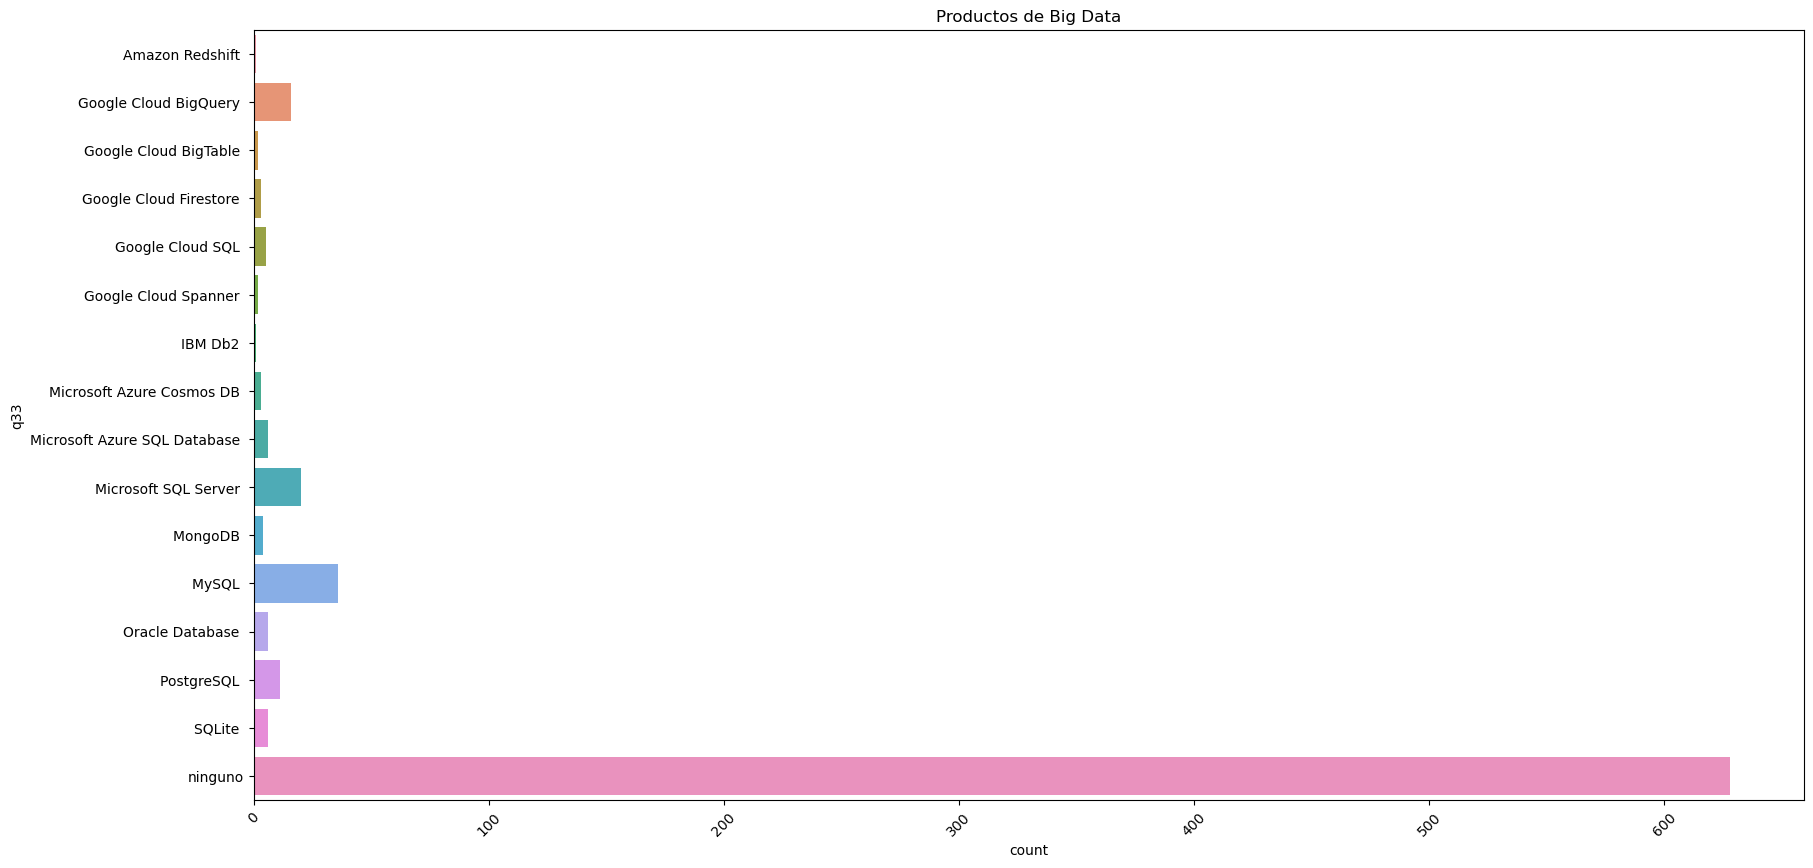

In [90]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q33', data=df_q33)
plt.title('Productos de Big Data')
fig.set(ylabel='Productos', xlabel= 'Conteo')
plt.xticks(rotation = 45);

Q36: Procesos de Auto ML

In [91]:
df_q36=df['q36'].reset_index()
df_q36

,index,q36
0,32,NaN
1,46,NaN
2,66,NaN
3,102,NaN
4,108,NaN
...,...,...
746,25811,NaN
747,25819,NaN
748,25909,NaN
749,25916,NaN


In [92]:
df_q36['q36'] = df_q36['q36'].apply(quitar_comillas)

In [93]:
df_q36_explode = df_q36['q36'].explode().reset_index()

In [94]:
df_q36_explode=df_q36_explode.fillna('ninguno')

In [95]:
gb_q36 = df_q36_explode.groupby('q36').size() #aqui tenemos todos los espacios, que se tienen que desestimar 
#para la creacion de las graficas

In [96]:
df_q36 = gb_q36.reset_index(name='count')

In [97]:
df_q36

,q36,count
0,,26
1,"Automated data augmentation (e.g. imgaug, albu...",26
2,Automated feature engineering/selection (e.g. ...,5
3,Automated hyperparameter tuning (e.g. hyperopt...,1
4,Automated model architecture searches (e.g. da...,1
5,"Automated model selection (e.g. auto-sklearn, ...",1
6,Automation of full ML pipelines (e.g. Google A...,1
7,ninguno,725


In [98]:
df_q36.drop(0, axis= 0,inplace=True)

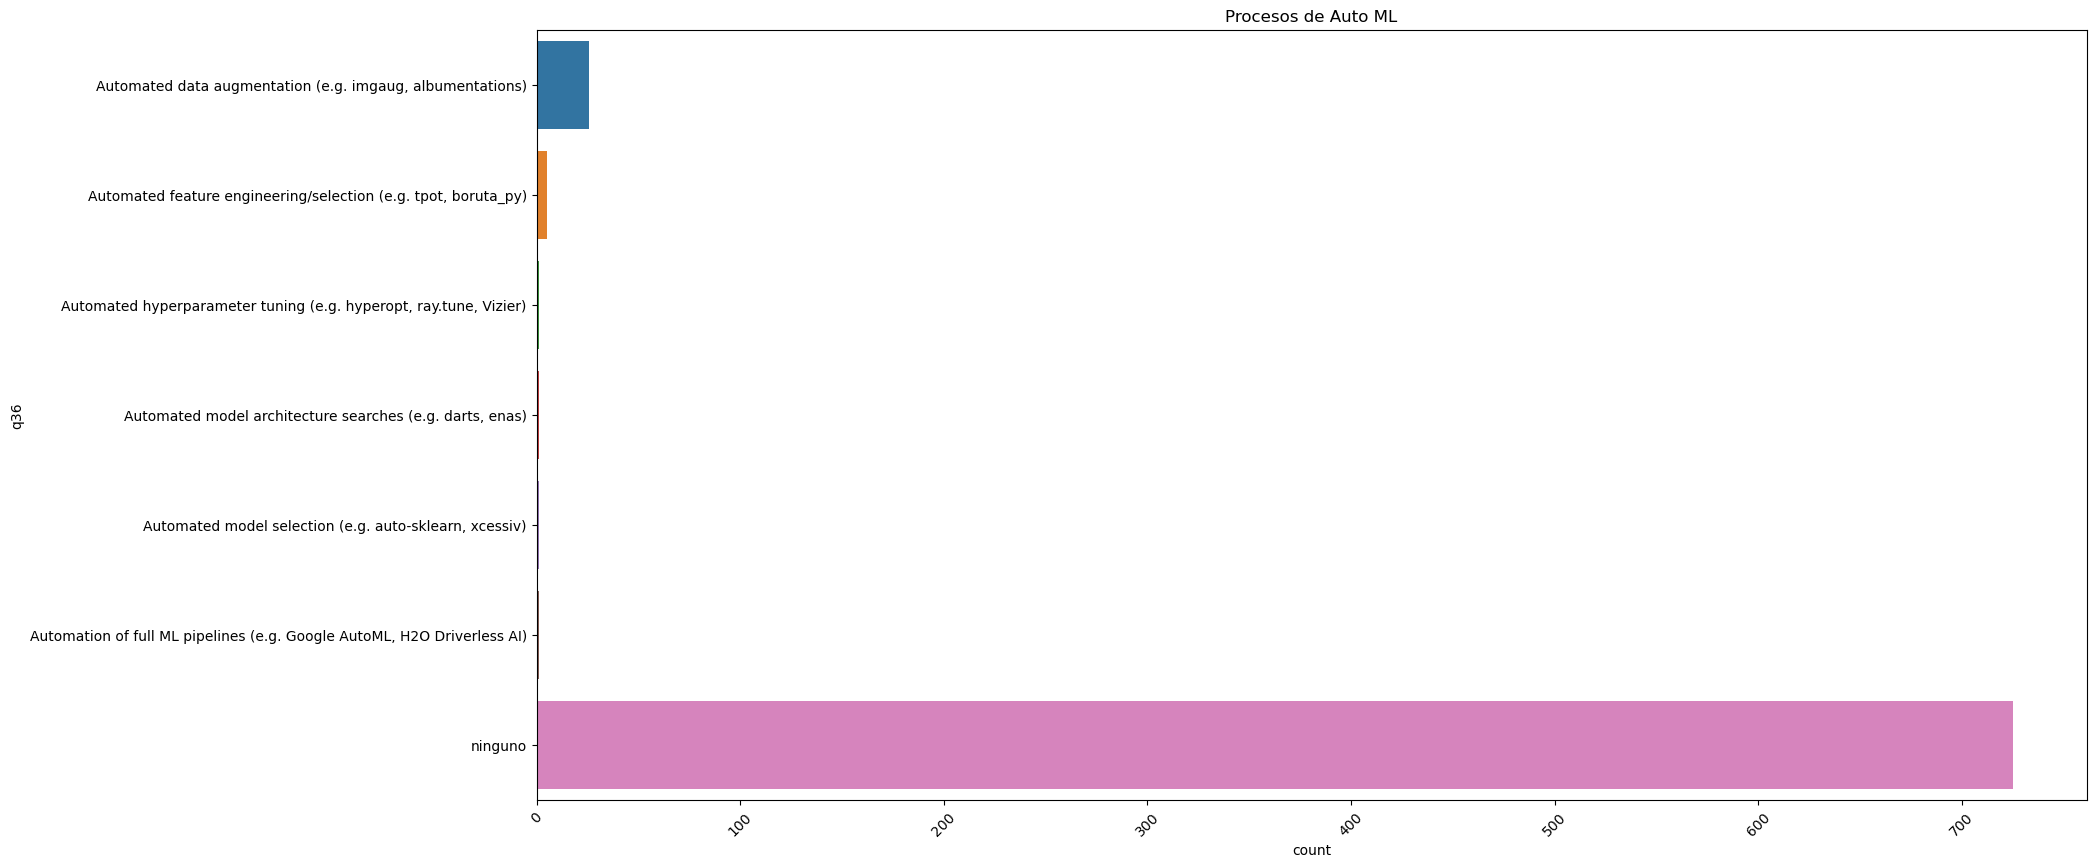

In [99]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q36', data=df_q36)
plt.title('Procesos de Auto ML')
fig.set(ylabel='Procesos', xlabel= 'Conteo')
plt.xticks(rotation = 45);

Q37: Herramientas de AML

In [100]:
df_q37=df['q37'].reset_index()
df_q37

,index,q37
0,32,NaN
1,46,NaN
2,66,NaN
3,102,NaN
4,108,NaN
...,...,...
746,25811,NaN
747,25819,NaN
748,25909,NaN
749,25916,NaN


In [101]:
df_q37['q37'] = df_q37['q37'].apply(quitar_comillas)

In [102]:
df_q37_explode = df_q37['q37'].explode().reset_index()

In [103]:
df_q37_explode=df_q37_explode.fillna('ninguno')

In [104]:
gb_q37 = df_q37_explode.groupby('q37').size()

In [105]:
df_q37 = gb_q37.reset_index(name='count')

In [106]:
df_q37

,q37,count
0,,18
1,Google Cloud AutoML,18
2,ninguno,733


In [107]:
df_q37.drop(0, axis= 0,inplace=True)

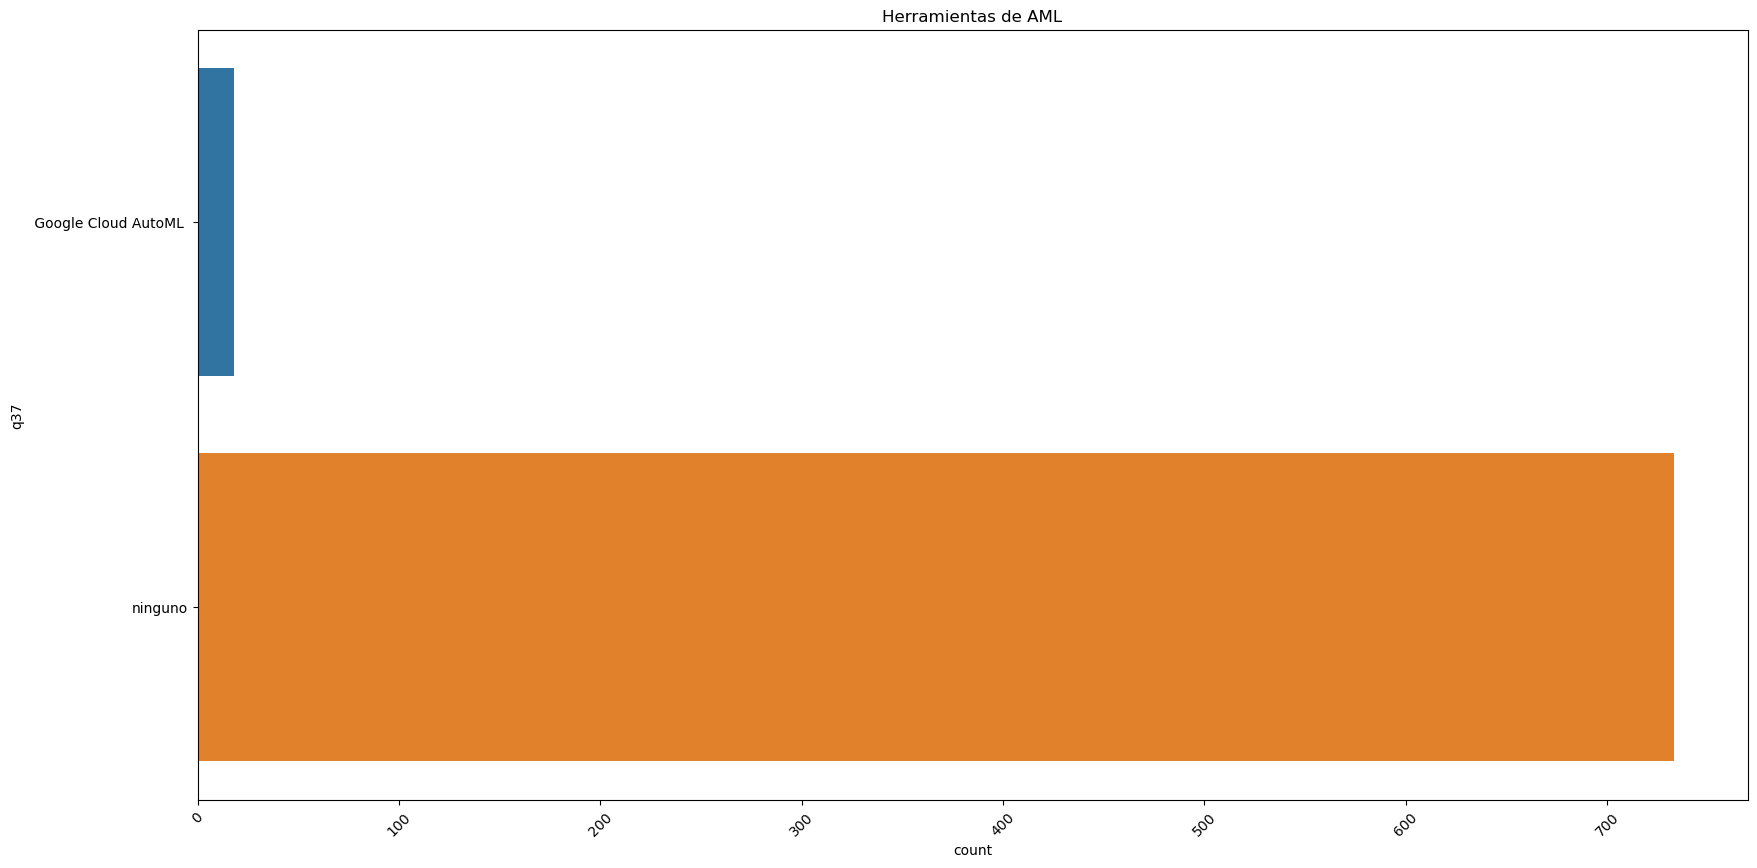

In [108]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q37', data=df_q37)
plt.title('Herramientas de AML')
fig.set(ylabel='Herramienta', xlabel= 'Conteo')
plt.xticks(rotation = 45);

Q38: Herramientas de Gestion de ML

In [109]:
df_q38=df['q38'].reset_index()
df_q38

,index,q38
0,32,NaN
1,46,NaN
2,66,NaN
3,102,NaN
4,108,NaN
...,...,...
746,25811,NaN
747,25819,NaN
748,25909,NaN
749,25916,NaN


In [110]:
df_q38['q38'] = df_q38['q38'].apply(quitar_comillas)

In [111]:
df_q38_explode = df_q38['q38'].explode().reset_index()

In [112]:
df_q38_explode=df_q38_explode.fillna('ninguno')

In [113]:
gb_q38 = df_q38_explode.groupby('q38').size()

In [114]:
df_q38 = gb_q38.reset_index(name='count')

In [115]:
df_q38

,q38,count
0,,6
1,Neptune.ai,6
2,Weights & Biases,2
3,ninguno,745


In [116]:
df_q38.drop(0, axis= 0,inplace=True)

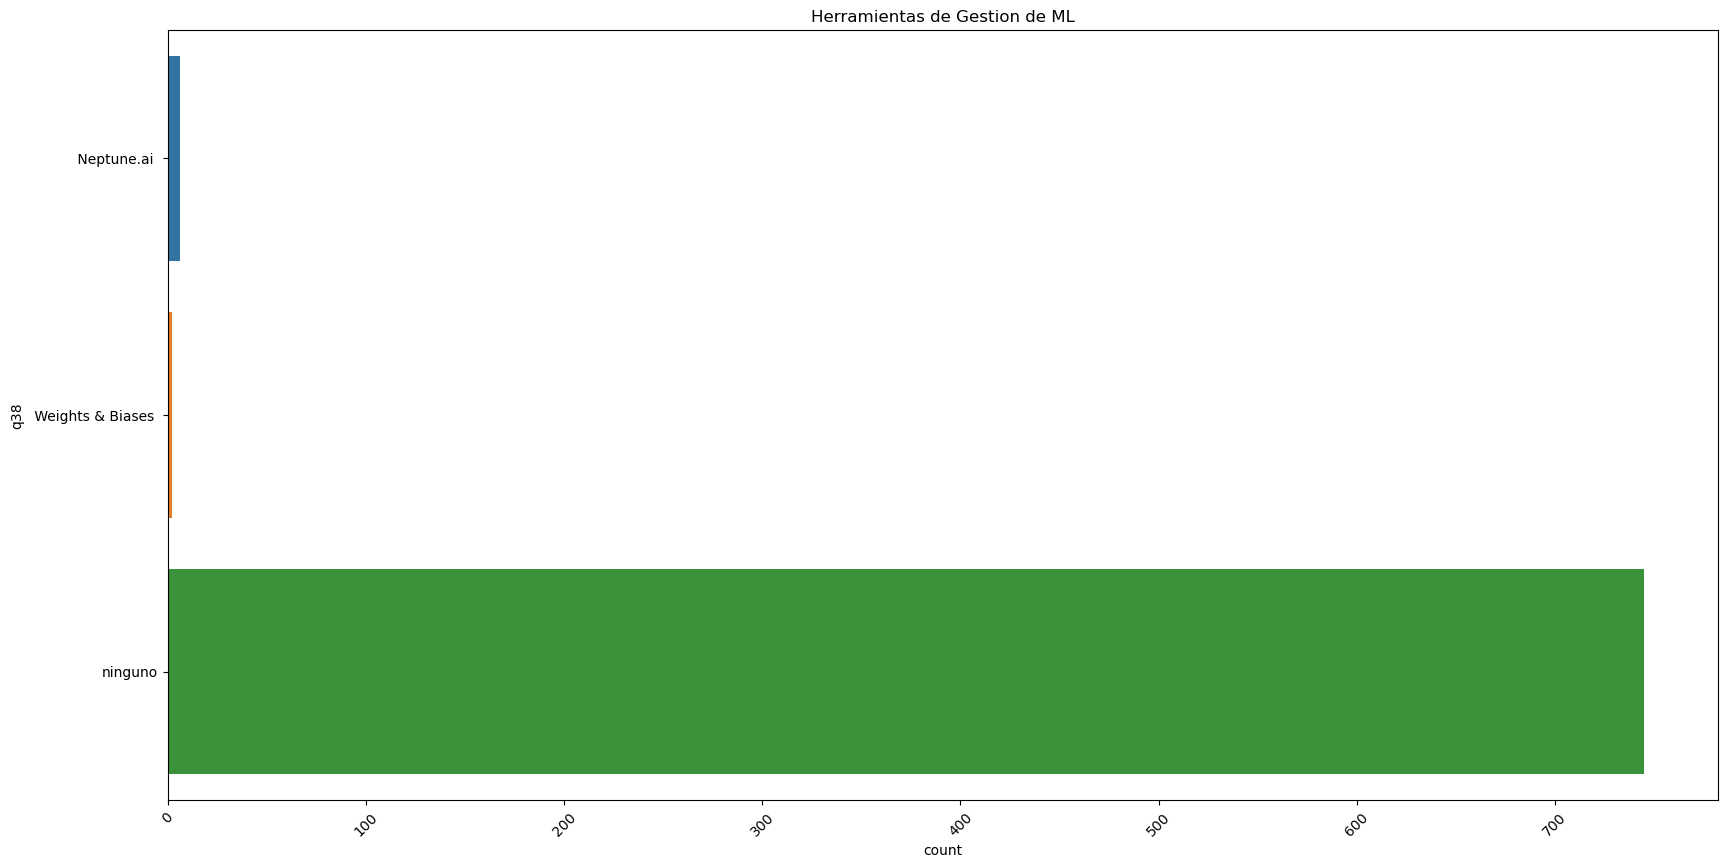

In [117]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q38', data=df_q38)
plt.title('Herramientas de Gestion de ML')
fig.set(ylabel='Herramienta', xlabel= 'Conteo')
plt.xticks(rotation = 45);

Q39: Aplicaciones de publicación

In [118]:
df_q39=df['q39'].reset_index()
df_q39

,index,q39
0,32,NaN
1,46,NaN
2,66,NaN
3,102,NaN
4,108,NaN
...,...,...
746,25811,NaN
747,25819,NaN
748,25909,NaN
749,25916,NaN


In [119]:
df_q39['q39'] = df_q39['q39'].apply(quitar_comillas)

In [120]:
df_39_explode = df_q39['q39'].explode().reset_index()

In [121]:
df_39_explode=df_39_explode.fillna('ninguno')

In [122]:
df_39_explode['q39'].unique()

array(['ninguno', ' Plotly Dash ', ''], dtype=object)

In [123]:
gb39 = df_39_explode.groupby('q39').size() 

In [124]:
df_q39 = gb39.reset_index(name='count')

In [125]:
df_q39.drop(0, axis= 0,inplace=True)

In [126]:
df_q39

,q39,count
1,Plotly Dash,7
2,ninguno,744


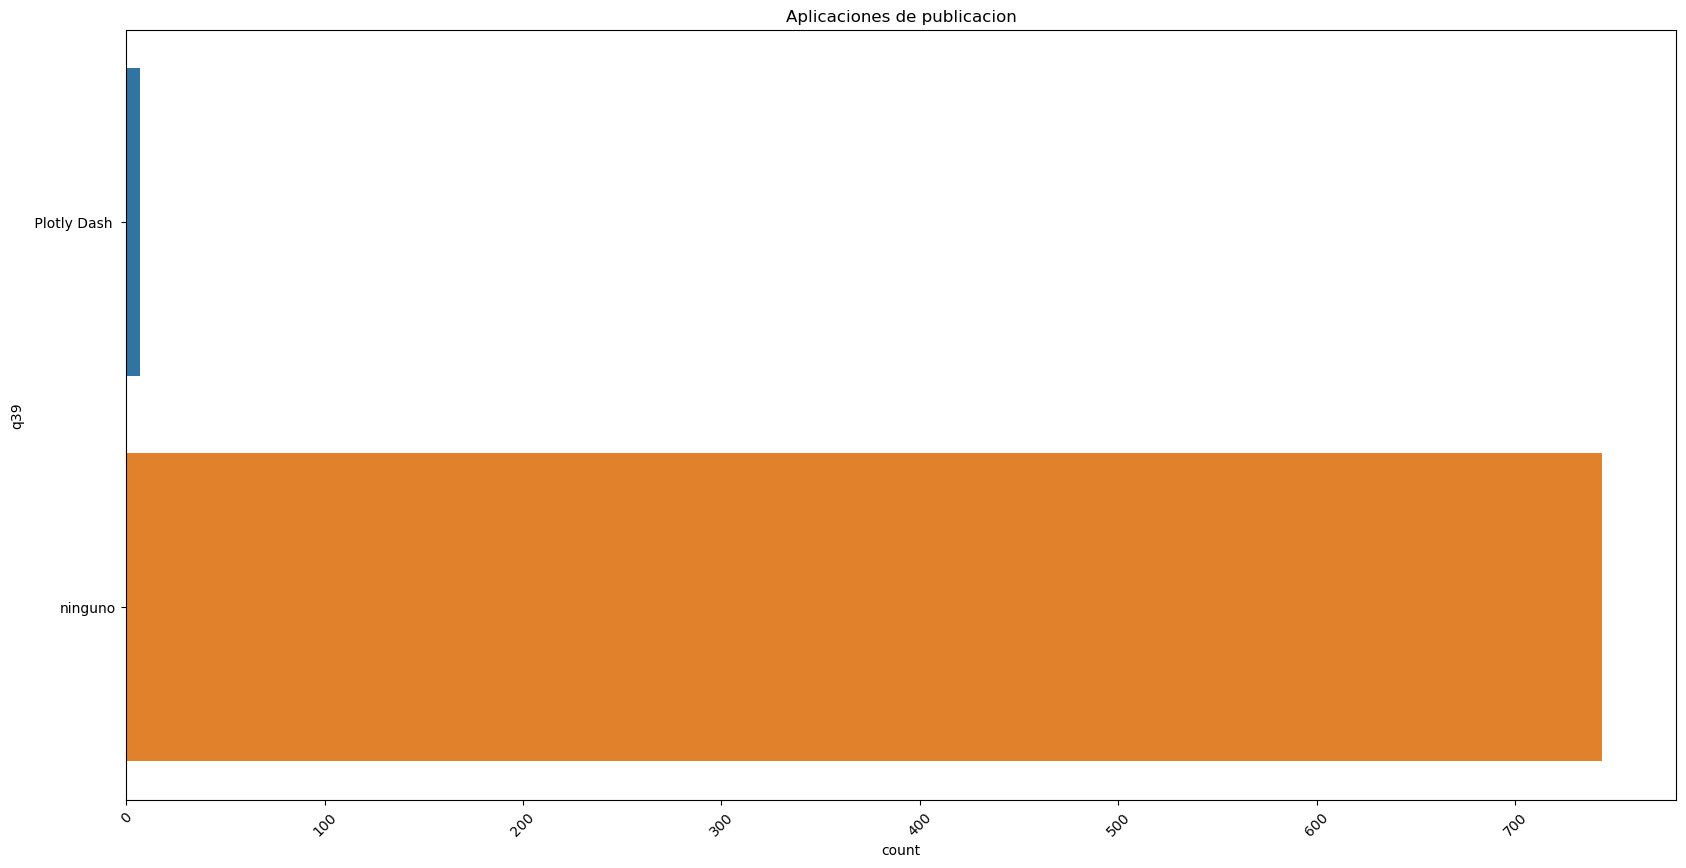

In [127]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q39', data=df_q39)
plt.title('Aplicaciones de publicacion')
fig.set(ylabel='Aplicaciones', xlabel= 'Conteo')
plt.xticks(rotation = 45);

Q40: Plataformas de cursos de DS

In [128]:
df_q40=df['q40'].reset_index()
df_q40

,index,q40
0,32,NaN
1,46,Coursera?edX?Kaggle Learn Courses?
2,66,NaN
3,102,Coursera?
4,108,Coursera?
...,...,...
746,25811,Coursera?
747,25819,Coursera?
748,25909,NaN
749,25916,Coursera?


In [129]:
df_q40['q40'] = df_q40['q40'].apply(quitar_comillas)

In [130]:
df_40_explode = df_q40['q40'].explode().reset_index()

In [131]:
df_40_explode=df_40_explode.fillna('ninguno')

In [132]:
df_40_explode['q40'].unique()

array(['ninguno', 'Coursera', 'edX', 'Kaggle Learn Courses', '',
       'DataCamp', 'Fast.ai', 'Udacity'], dtype=object)

In [133]:
gb40 = df_40_explode.groupby('q40').size() 

In [134]:
df_q40 = gb40.reset_index(name='count')

In [135]:
df_q40.drop(0, axis= 0,inplace=True)

In [136]:
df_q40

,q40,count
1,Coursera,246
2,DataCamp,14
3,Fast.ai,1
4,Kaggle Learn Courses,32
5,Udacity,1
6,edX,57
7,ninguno,505


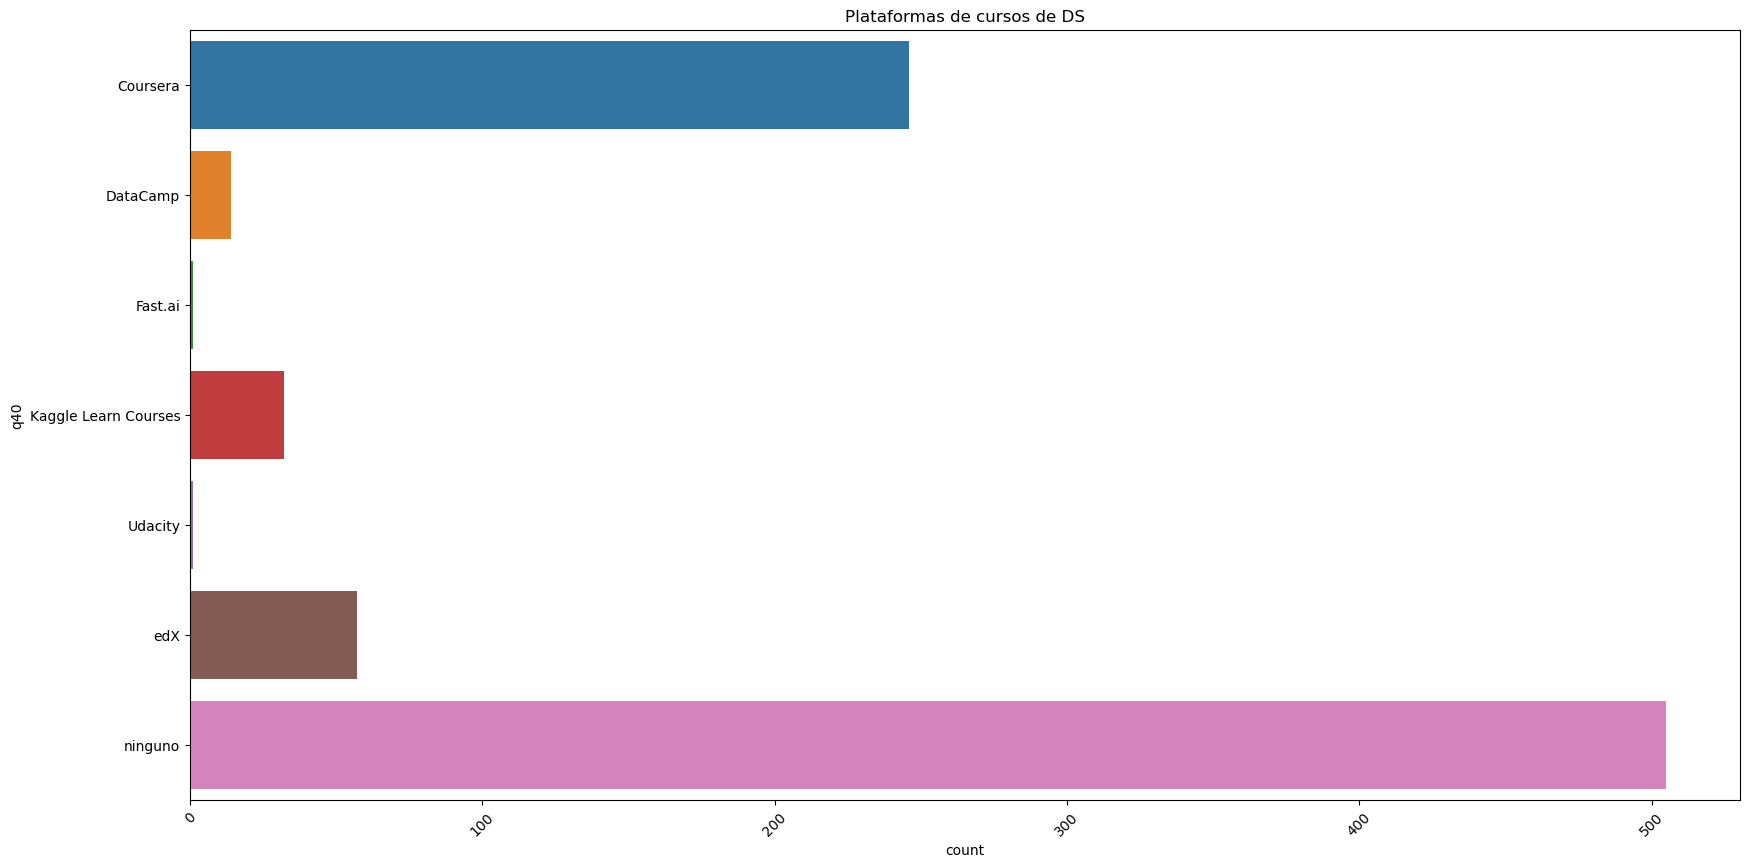

In [137]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q40', data=df_q40)
plt.title('Plataformas de cursos de DS')
fig.set(ylabel='Plataformas', xlabel= 'Conteo')
plt.xticks(rotation = 45);

Q42: Redes Sociales

In [138]:
df_q42=df['q42'].reset_index()
df_q42

,index,q42
0,32,NaN
1,46,Twitter (data science influencers)?
2,66,NaN
3,102,NaN
4,108,NaN
...,...,...
746,25811,Twitter (data science influencers)?Email newsl...
747,25819,NaN
748,25909,NaN
749,25916,NaN


In [139]:
df_q42['q42'] = df_q42['q42'].apply(quitar_comillas)

In [140]:
df_42_explode = df_q42['q42'].explode().reset_index()

In [141]:
df_42_explode=df_42_explode.fillna('ninguno')

In [142]:
df_42_explode['q42'].unique()

array(['ninguno', 'Twitter (data science influencers)', '',
       "Email newsletters (Data Elixir, O'Reilly Data & AI, etc)",
       'Reddit (r/machinelearning, etc)',
       'Kaggle (notebooks, forums, etc)',
       'Course Forums (forums.fast.ai, Coursera forums, etc)',
       'YouTube (Kaggle YouTube, Cloud AI Adventures, etc)',
       'Podcasts (Chai Time Data Science, O’Reilly Data Show, etc)',
       'Blogs (Towards Data Science, Analytics Vidhya, etc)',
       'Journal Publications (peer-reviewed journals, conference proceedings, etc)',
       'Slack Communities (ods.ai, kagglenoobs, etc)'], dtype=object)

In [143]:
gb42 = df_42_explode.groupby('q42').size() #aqui tenemos todos los espacios, que se tienen que desestimar 
#para la creacion de las graficas

In [144]:
df_q42 = gb42.reset_index(name='count')

In [145]:
df_q42.drop(0, axis= 0,inplace=True)

In [146]:
df_q42

,q42,count
1,"Blogs (Towards Data Science, Analytics Vidhya,...",2
2,"Course Forums (forums.fast.ai, Coursera forums...",3
3,"Email newsletters (Data Elixir, O'Reilly Data ...",20
4,"Journal Publications (peer-reviewed journals, ...",1
5,"Kaggle (notebooks, forums, etc)",3
6,"Podcasts (Chai Time Data Science, O’Reilly Dat...",2
7,"Reddit (r/machinelearning, etc)",4
8,"Slack Communities (ods.ai, kagglenoobs, etc)",1
9,Twitter (data science influencers),81
10,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",3


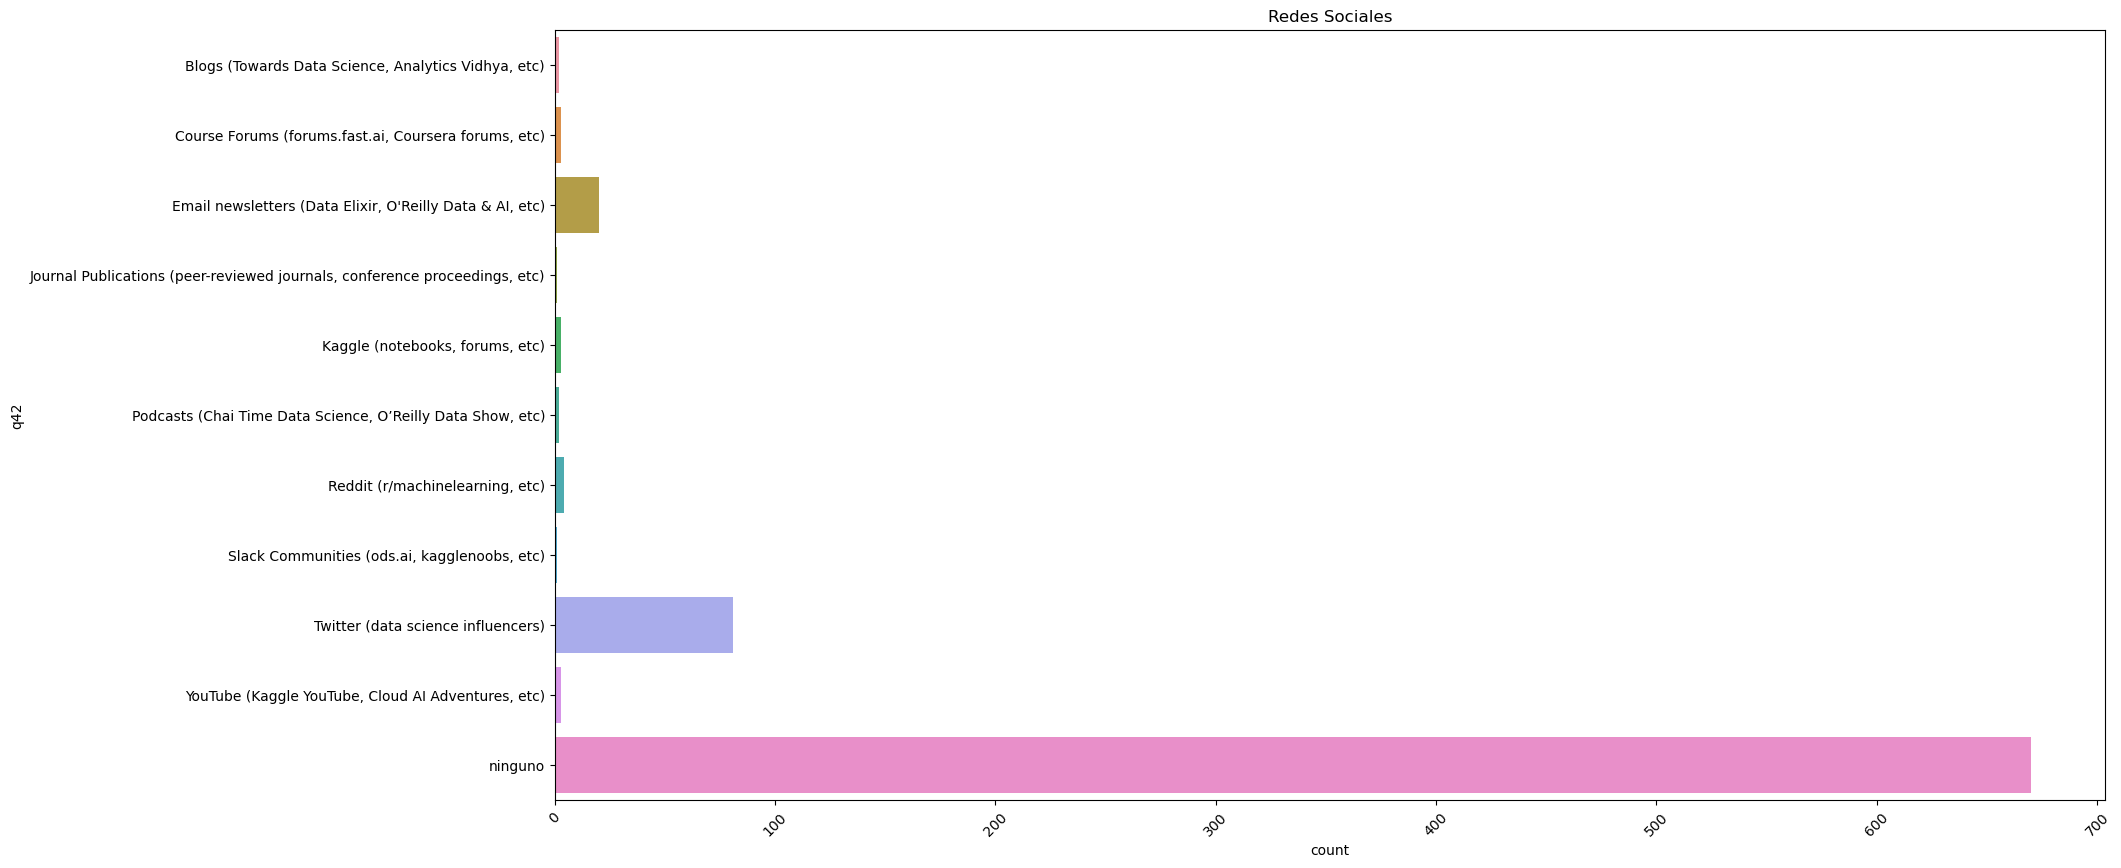

In [147]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q42', data=df_q42)
plt.title('Redes Sociales')
fig.set(ylabel='RR.SS', xlabel= 'Conteo')
plt.xticks(rotation = 45);

Nuestro siguiente objetivo es componer un subplot con todas nuestras gráficas, las que nos dicen que no utilizan ninguna de las herramientas consultadas. 


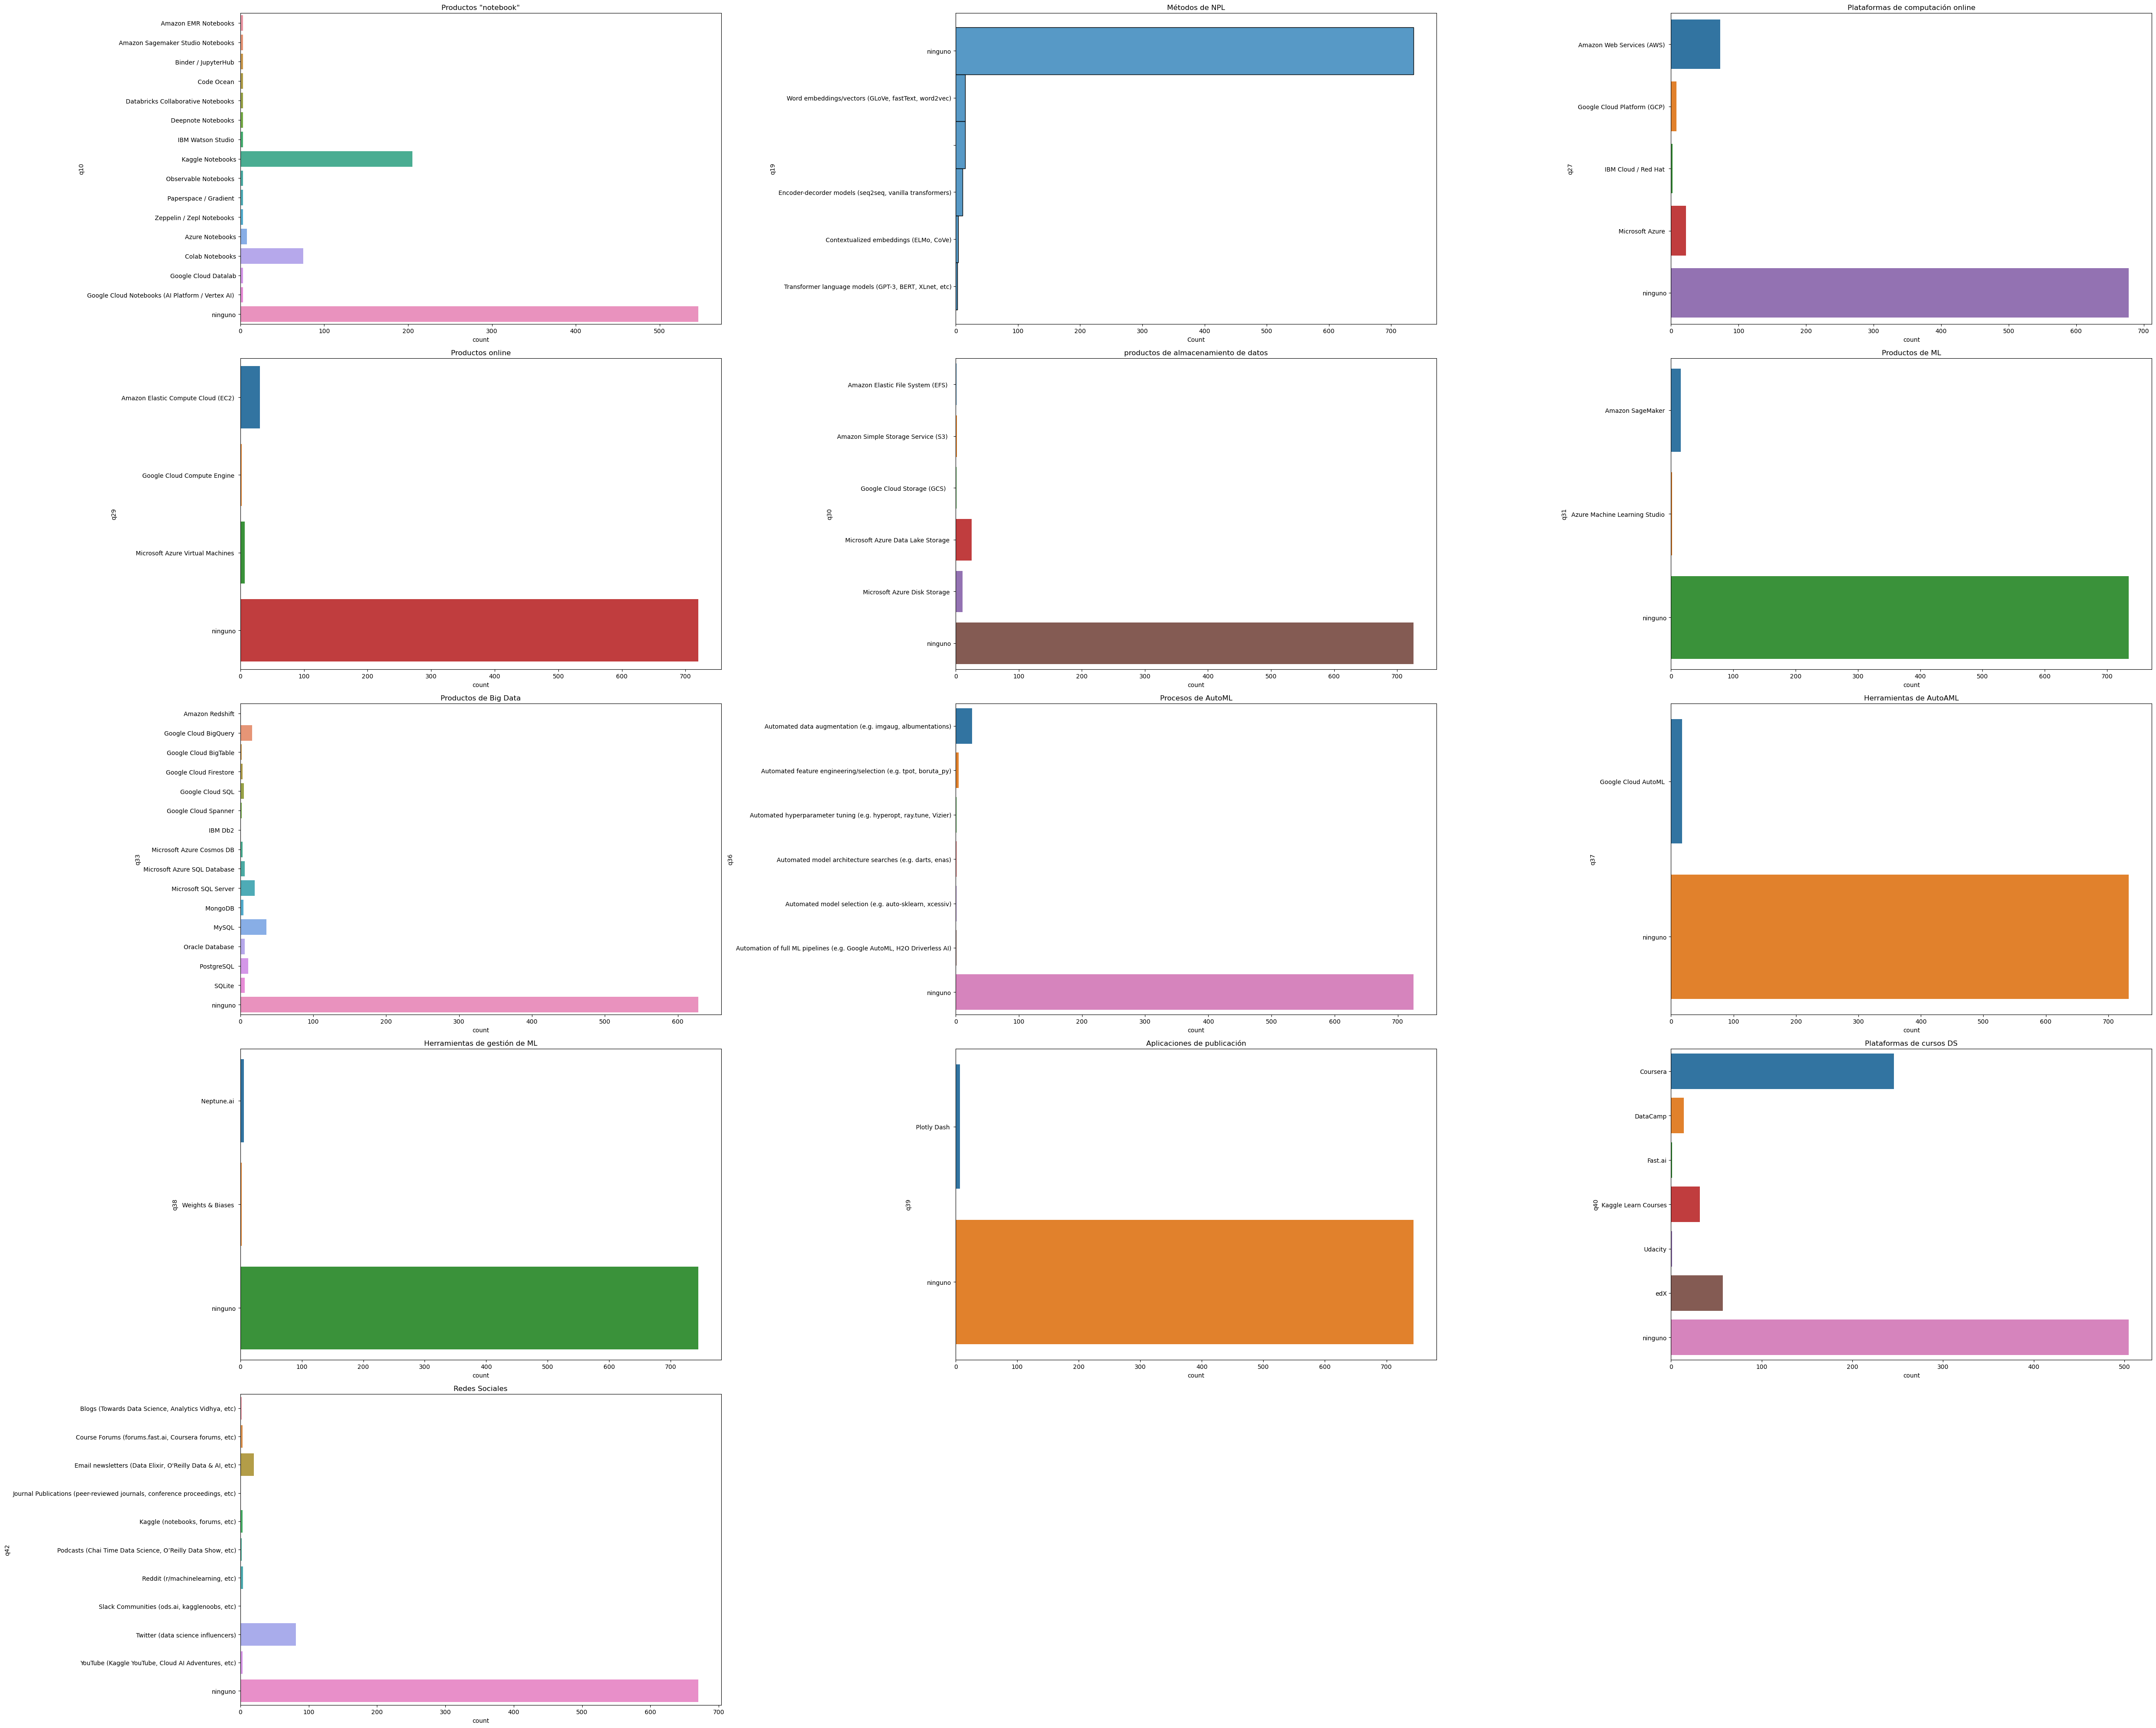

In [148]:
# generamos un subplot con todas las gráficas seleccionadas en una sóla figura. 

fig, axes = plt.subplots(nrows=5, ncols = 3, figsize = (50, 40))
axes = axes.flat


sns.barplot(x ='count', y = 'q10', data=df_q10, ax = axes[0])
axes[0].set(title = 'Productos "notebook"' )
#plt.title('Hosted notebook products', ax = axes[0])
#axes[0] = plt.xticks(rotation = 45)

sns.histplot(y = 'q19', data = df_19_explode, ax = axes[1])
axes[1].set(title = 'Métodos de NPL' )
#plt.title('natural language processing (NLP) methods', ax = axes[1])
#axes[1] = plt.xticks(rotation = 45)

sns.barplot(x ='count', y = 'q27', data = df_q27, ax = axes[2])
axes[2].set(title = 'Plataformas de computación online' )
#plt.title('Cloud computing platforms', ax = axes[2])
#axes[2] = plt.xticks(rotation = 45)

sns.barplot(x ='count', y = 'q29', data=df_29_gp, ax = axes[3])
axes[3].set(title ="Productos online")
#axes[3] = plt.xticks(rotation = 45)

sns.barplot(x ='count', y = 'q30', data=df_30_gp, ax = axes[4])
axes[4].set(title ="productos de almacenamiento de datos")
#axes[4] = plt.xticks(rotation = 45)

sns.barplot(x ='count', y = 'q31', data=df_31_gp, ax = axes[5])
axes[5].set(title ="Productos de ML")
#axes[5] = plt.xticks(rotation = 45)

sns.barplot(x ='count', y = 'q33', data=df_q33, ax = axes[6])
axes[6].set(title ="Productos de Big Data")
#axes[6] = plt.xticks(rotation = 45)

sns.barplot(x ='count', y = 'q36', data=df_q36, ax = axes[7])
axes[7].set(title ="Procesos de AutoML")
#axes[7] = plt.xticks(rotation = 45)

sns.barplot(x ='count', y = 'q37', data=df_q37, ax = axes[8])
axes[8].set(title ="Herramientas de AutoAML")
#axes[8].plt.xticks(rotation = 45)

sns.barplot(x ='count', y = 'q38', data=df_q38, ax = axes[9])
axes[9].set(title ="Herramientas de gestión de ML")
#axes[9].plt.xticks(rotation = 45)

sns.barplot(x ='count', y = 'q39', data=df_q39, ax = axes[10])
axes[10].set(title ="Aplicaciones de publicación")
#axes[10] = plt.xticks(rotation = 45)

sns.barplot(x ='count', y = 'q40', data=df_q40, ax = axes[11])
axes[11].set(title ="Plataformas de cursos DS")
#axes[11] = plt.xticks(rotation = 45)

sns.barplot(x ='count', y = 'q42', data=df_q42, ax = axes[12])
axes[12].set(title ="Redes Sociales")
#axes[12] = plt.xticks(rotation = 45)





plt.xticks(rotation = 45)
fig.tight_layout()
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])
plt.show()

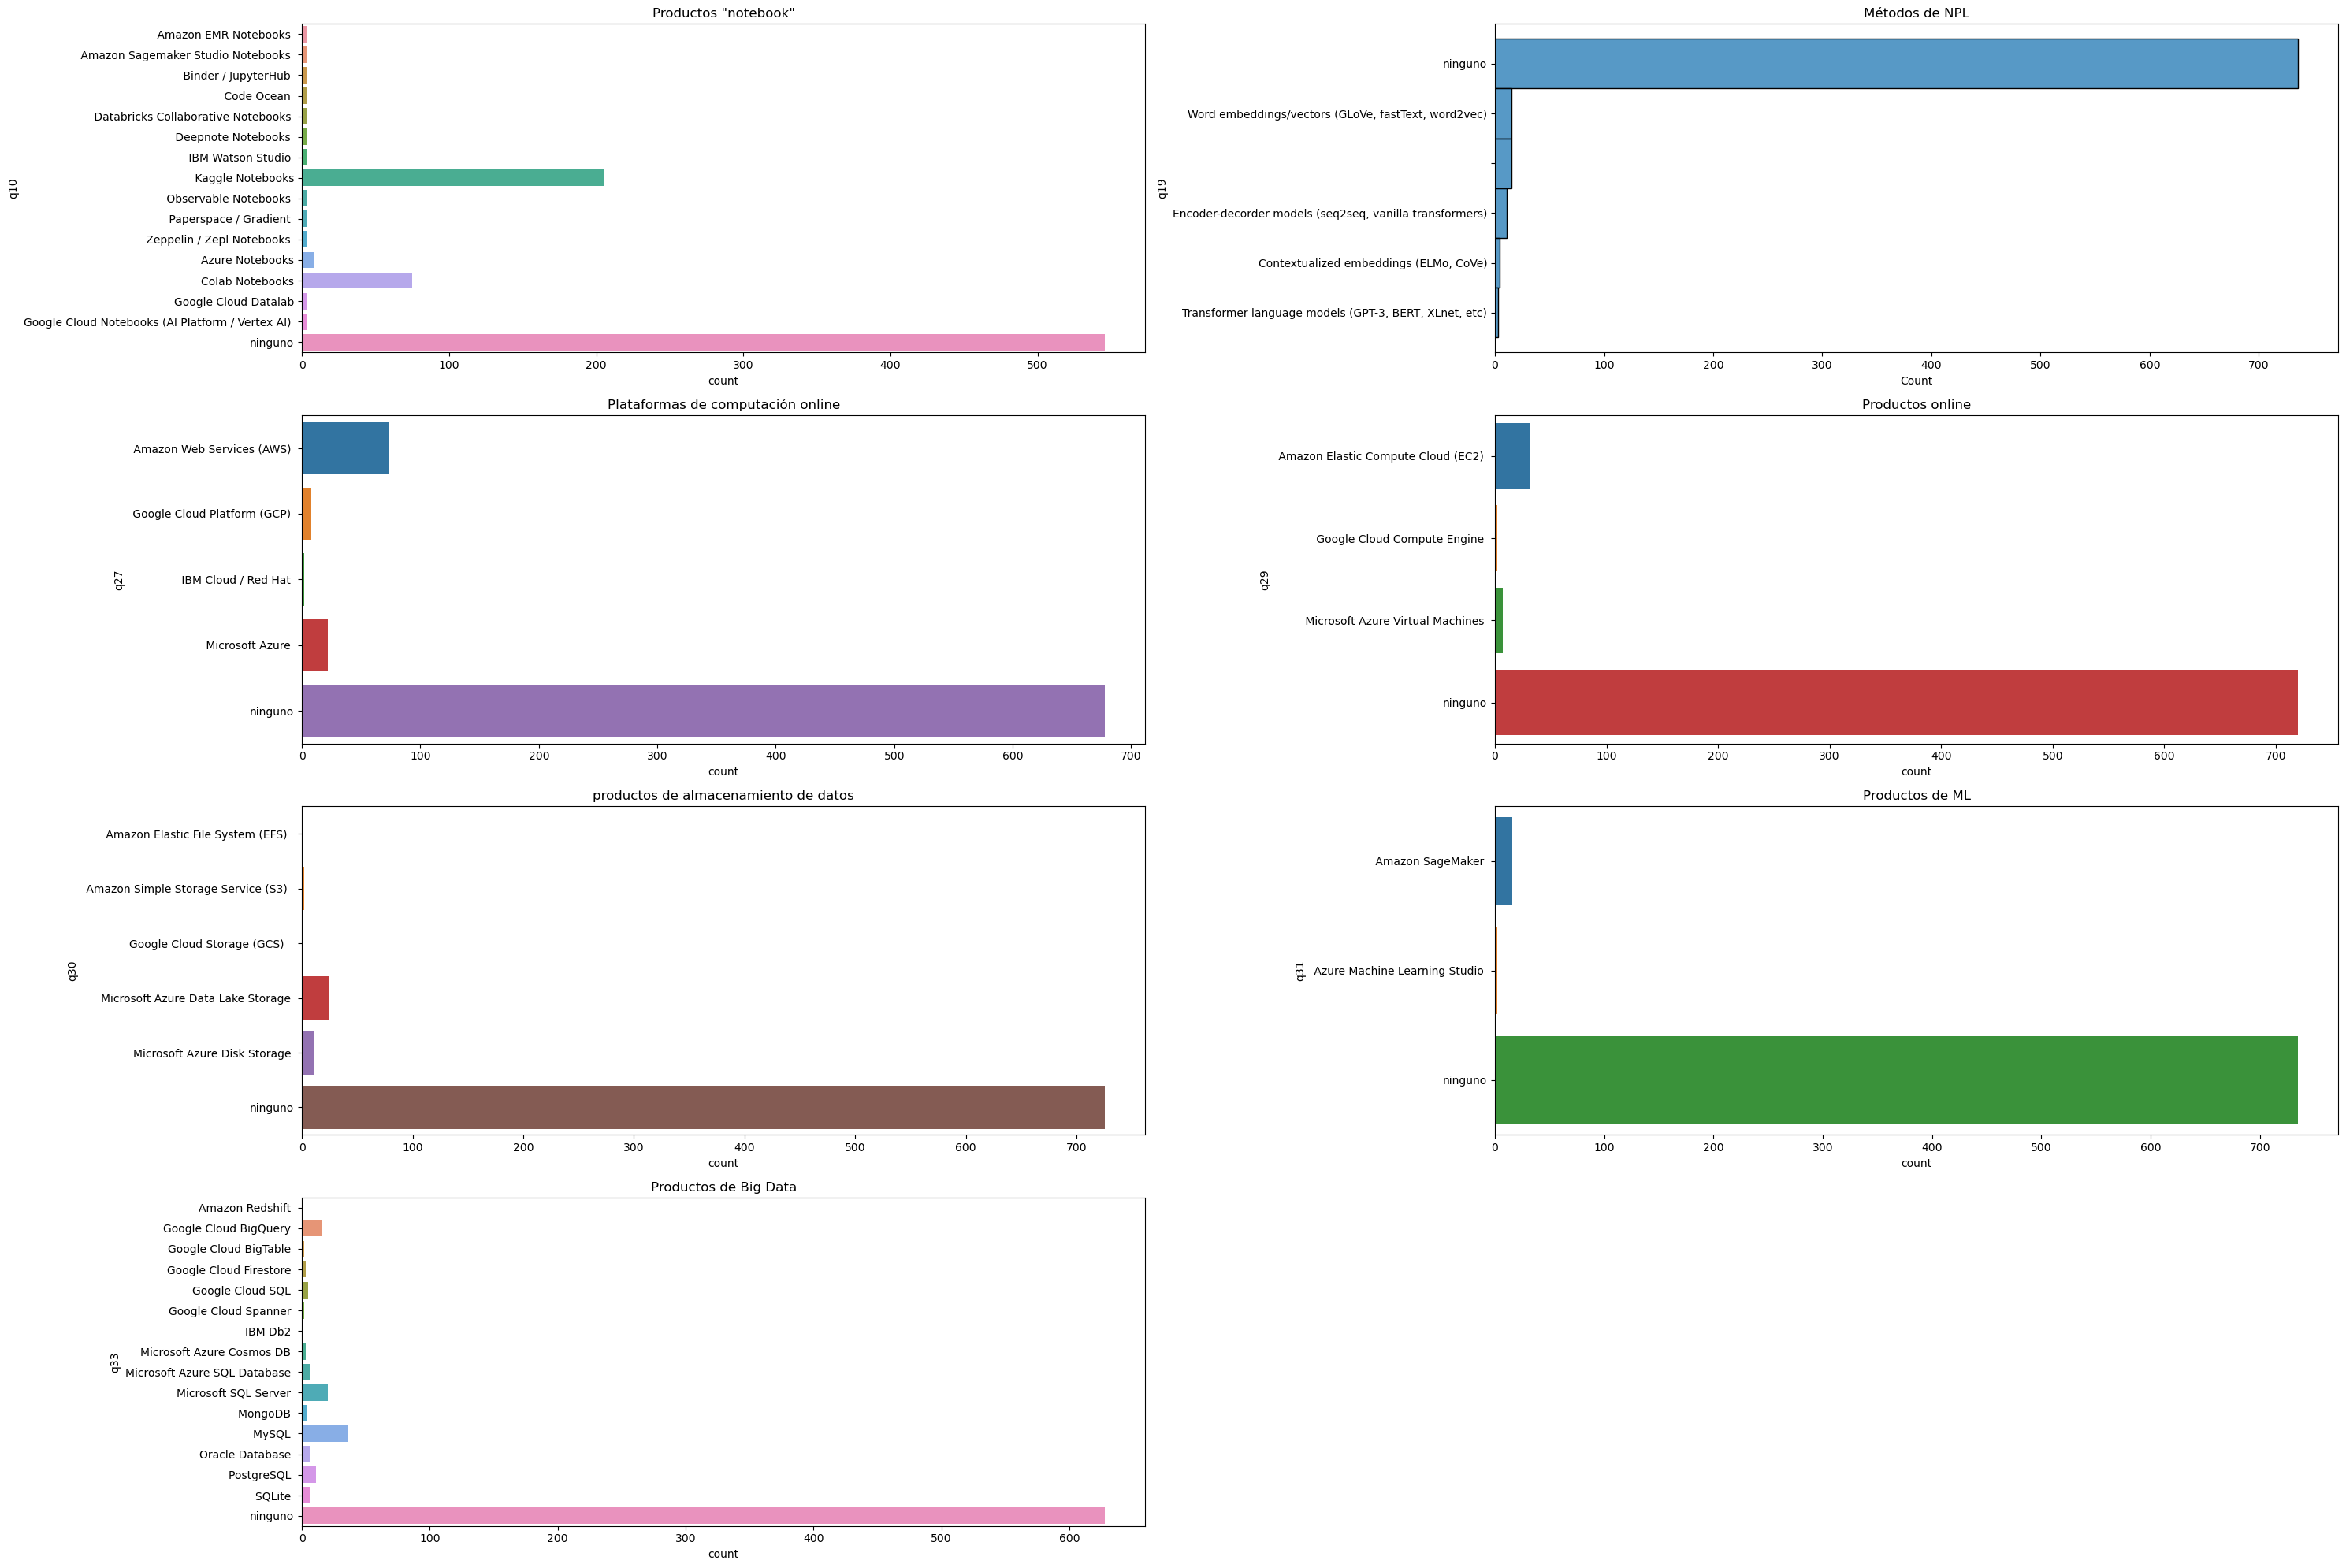

In [149]:
# para facilitar su visualización, vamos a generar dos subplots para mostrar todas las gráficas

fig, axes = plt.subplots(nrows=4, ncols = 2, figsize = (30, 20))
axes = axes.flat


sns.barplot(x ='count', y = 'q10', data=df_q10, ax = axes[0])
axes[0].set(title = 'Productos "notebook"' )
#plt.title('Hosted notebook products', ax = axes[0])
#axes[0] = plt.xticks(rotation = 45)

sns.histplot(y = 'q19', data = df_19_explode, ax = axes[1])
axes[1].set(title = 'Métodos de NPL' )
#plt.title('natural language processing (NLP) methods', ax = axes[1])
#axes[1] = plt.xticks(rotation = 45)

sns.barplot(x ='count', y = 'q27', data = df_q27, ax = axes[2])
axes[2].set(title = 'Plataformas de computación online' )
#plt.title('Cloud computing platforms', ax = axes[2])
#axes[2] = plt.xticks(rotation = 45)

sns.barplot(x ='count', y = 'q29', data=df_29_gp, ax = axes[3])
axes[3].set(title ="Productos online")
#axes[3] = plt.xticks(rotation = 45)

sns.barplot(x ='count', y = 'q30', data=df_30_gp, ax = axes[4])
axes[4].set(title ="productos de almacenamiento de datos")
#axes[4] = plt.xticks(rotation = 45)

sns.barplot(x ='count', y = 'q31', data=df_31_gp, ax = axes[5])
axes[5].set(title ="Productos de ML")
#axes[5] = plt.xticks(rotation = 45)

sns.barplot(x ='count', y = 'q33', data=df_q33, ax = axes[6])
axes[6].set(title ="Productos de Big Data")
#axes[6] = plt.xticks(rotation = 45)




plt.xticks(rotation = 45)
fig.tight_layout()
fig.delaxes(axes[-1])
#fig.delaxes(axes[-2])
plt.show()

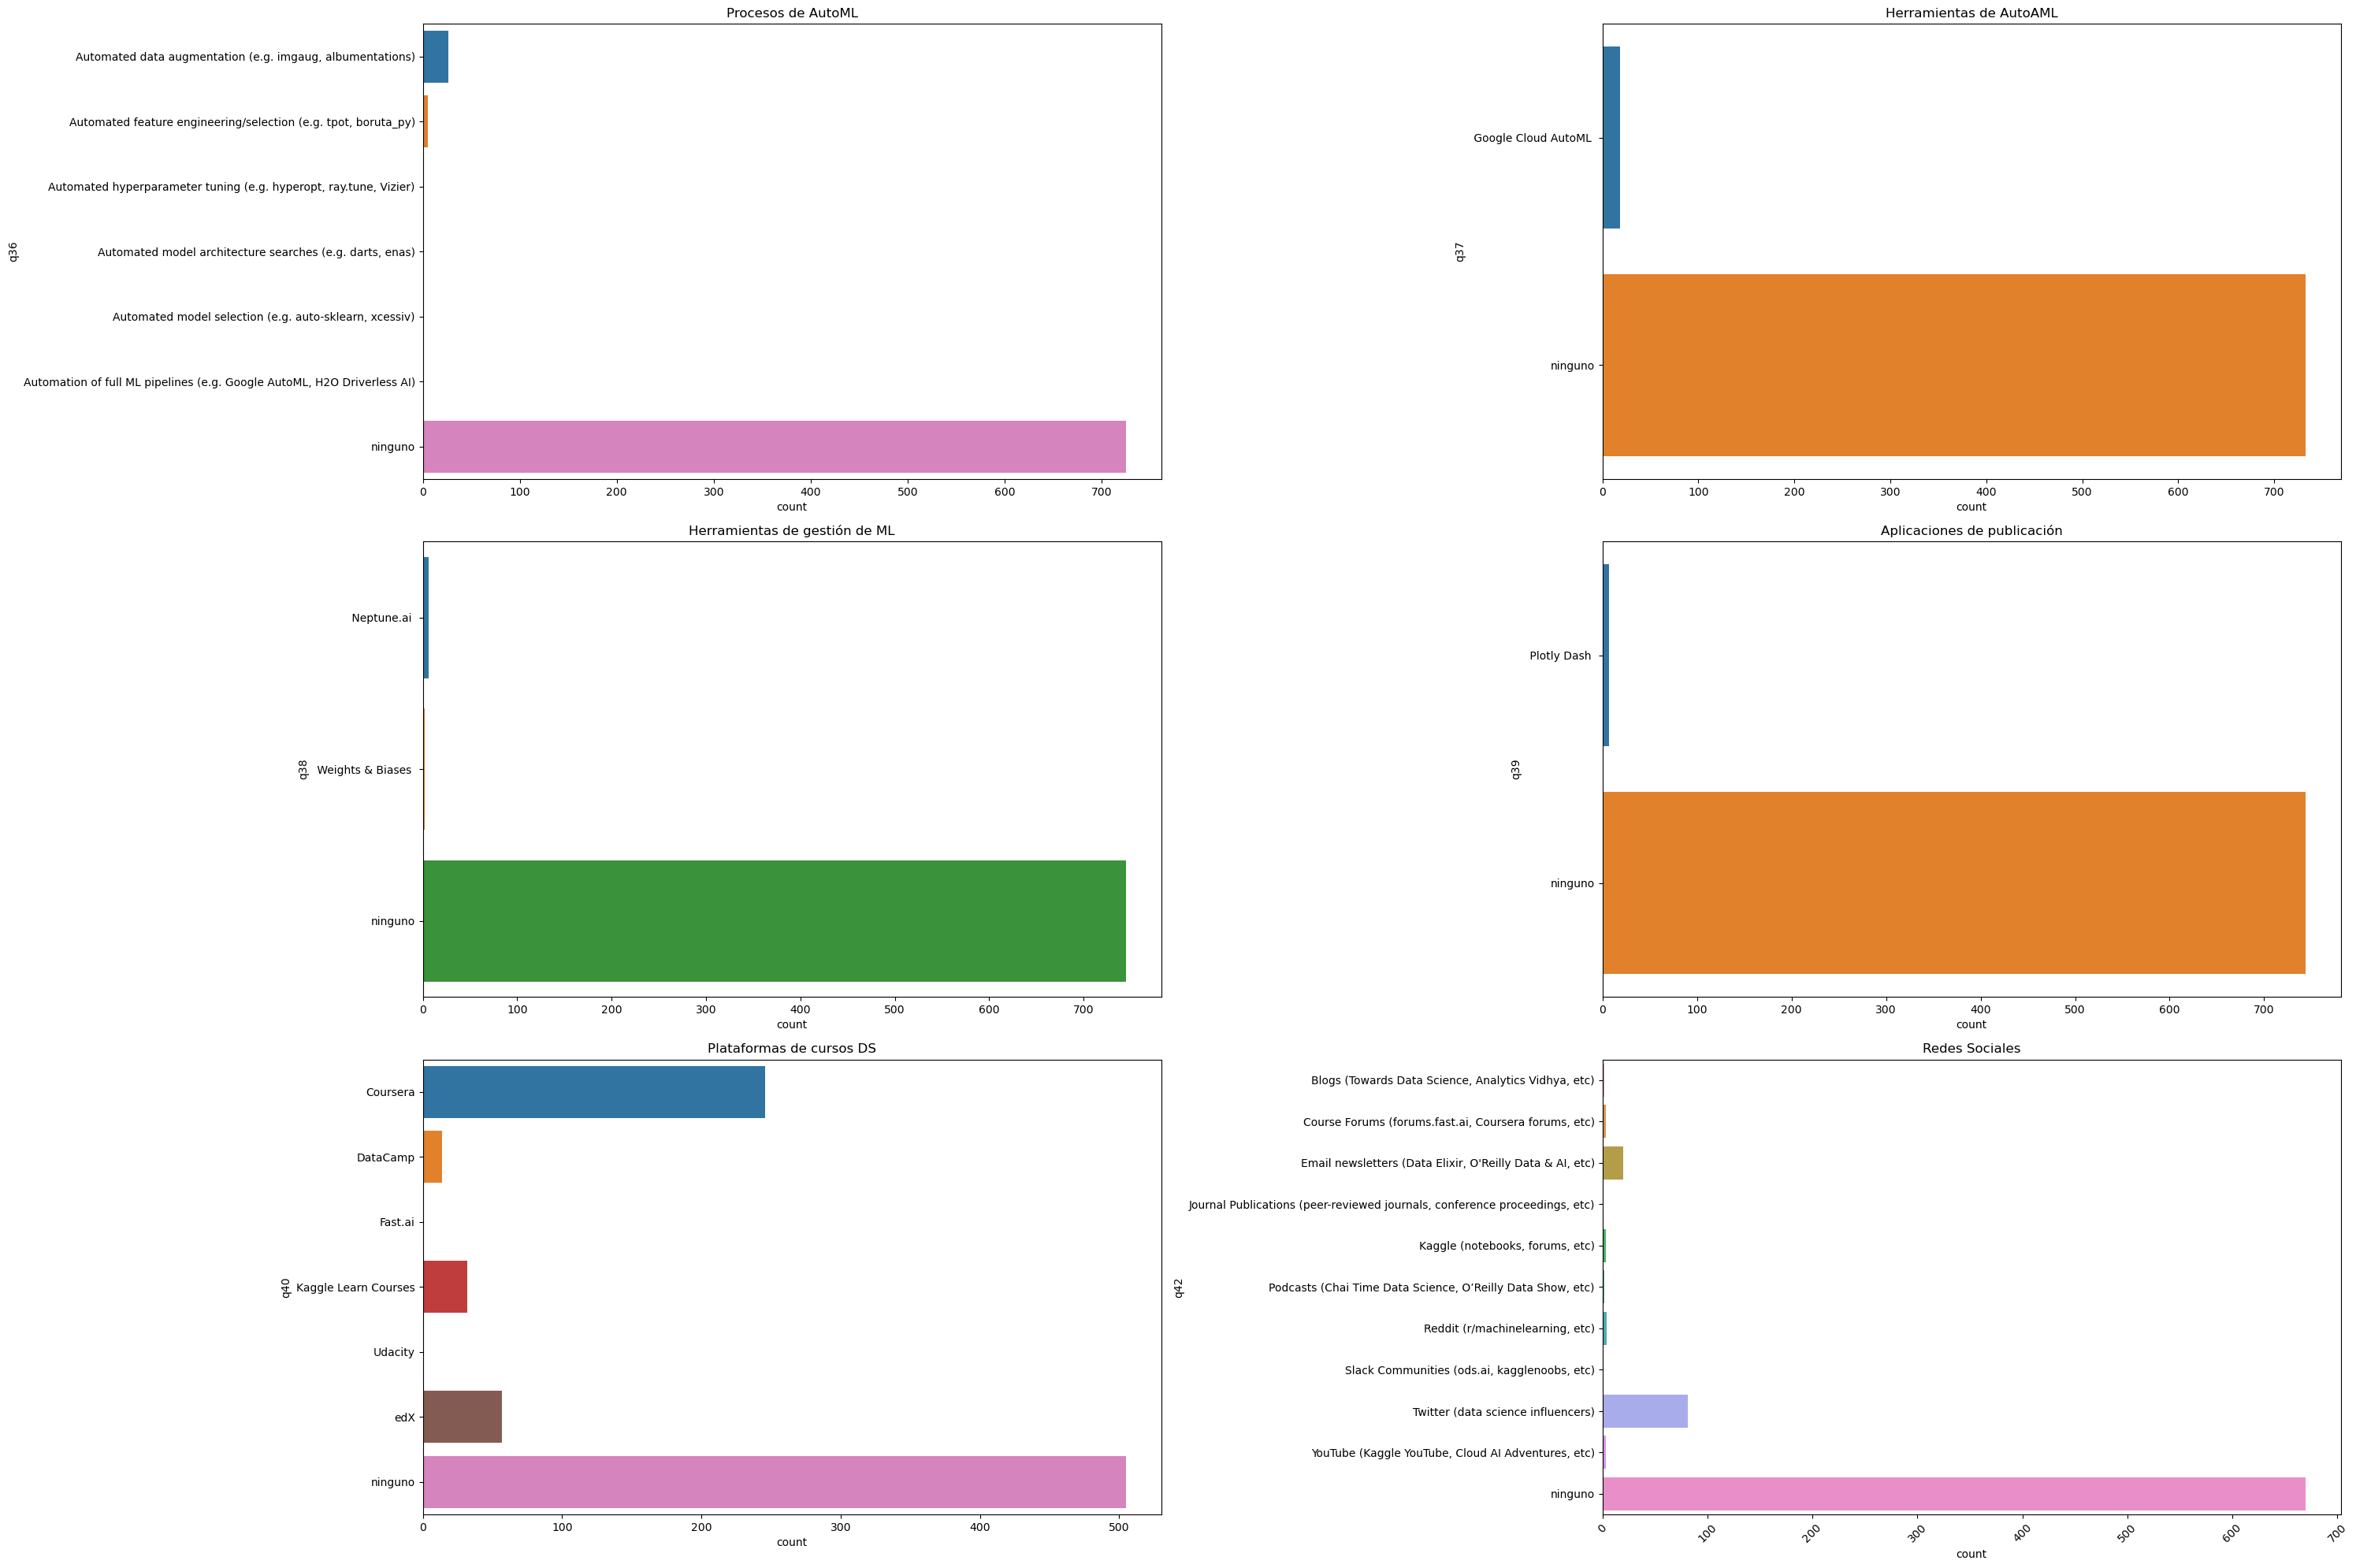

In [150]:
fig, axes = plt.subplots(nrows=3, ncols = 2, figsize = (30, 20))
axes = axes.flat

sns.barplot(x ='count', y = 'q36', data=df_q36, ax = axes[0])
axes[0].set(title ="Procesos de AutoML")
#axes[7] = plt.xticks(rotation = 45)

sns.barplot(x ='count', y = 'q37', data=df_q37, ax = axes[1])
axes[1].set(title ="Herramientas de AutoAML")
#axes[8].plt.xticks(rotation = 45)

sns.barplot(x ='count', y = 'q38', data=df_q38, ax = axes[2])
axes[2].set(title ="Herramientas de gestión de ML")
#axes[9].plt.xticks(rotation = 45)

sns.barplot(x ='count', y = 'q39', data=df_q39, ax = axes[3])
axes[3].set(title ="Aplicaciones de publicación")
#axes[10] = plt.xticks(rotation = 45)

sns.barplot(x ='count', y = 'q40', data=df_q40, ax = axes[4])
axes[4].set(title ="Plataformas de cursos DS")
#axes[11] = plt.xticks(rotation = 45)

sns.barplot(x ='count', y = 'q42', data=df_q42, ax = axes[5])
axes[5].set(title ="Redes Sociales")
#axes[12] = plt.xticks(rotation = 45)

plt.xticks(rotation = 45)
fig.tight_layout()
#fig.delaxes(axes[-1])
plt.show()